In [1]:
"""
SUPPORT VECTOR MACHINE (SVM) DESDE CERO
=======================================

Objetivos:
- Comprender SVM a trav√©s de implementaci√≥n scratch
- Implementar el m√©todo de multiplicadores de Lagrange
- Trabajar con kernels lineal y polinomial
- Visualizar vectores de soporte y regiones de decisi√≥n
- Comparar con implementaciones de scikit-learn

Sprint: Modelos lineales y m√©todos avanzados de clasificaci√≥n
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("="*80)
print("SUPPORT VECTOR MACHINE (SVM) DESDE CERO")
print("Implementaci√≥n Scratch con Multiplicadores de Lagrange")
print("="*80)


SUPPORT VECTOR MACHINE (SVM) DESDE CERO
Implementaci√≥n Scratch con Multiplicadores de Lagrange


In [2]:
# ============================================================================
# 1. FUNDAMENTOS TE√ìRICOS DE SVM
# ============================================================================

print("üìö 1. FUNDAMENTOS TE√ìRICOS DE SVM")
print("="*35)

print("""
üéØ SUPPORT VECTOR MACHINE (SVM):
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üìä CONCEPTO CENTRAL:
   ‚Ä¢ Maximizar el margen entre clases
   ‚Ä¢ Encontrar el hiperplano √≥ptimo de separaci√≥n
   ‚Ä¢ Solo los vectores de soporte importan para la decisi√≥n

üìà FORMULACI√ìN MATEM√ÅTICA:
   Minimizar: ¬Ω||w||¬≤ 
   Sujeto a: y·µ¢(w·µÄx·µ¢) ‚â• 1 para todo i
   
   Donde:
   ‚Ä¢ w: vector de pesos del hiperplano
   ‚Ä¢ x·µ¢: i-√©sima muestra de entrenamiento
   ‚Ä¢ y·µ¢: etiqueta de la i-√©sima muestra (-1 o +1)

üîÑ DUALIZACI√ìN CON MULTIPLICADORES DE LAGRANGE:
   Maximizar: Œ£·µ¢ Œª·µ¢ - ¬Ω Œ£·µ¢ Œ£‚±º Œª·µ¢Œª‚±ºy·µ¢y‚±ºk(x·µ¢,x‚±º)
   Sujeto a: Œª·µ¢ ‚â• 0 y Œ£·µ¢ Œª·µ¢y·µ¢ = 0
   
   Donde:
   ‚Ä¢ Œª·µ¢: multiplicador de Lagrange para la muestra i
   ‚Ä¢ k(x·µ¢,x‚±º): funci√≥n kernel

üìâ ACTUALIZACI√ìN POR DESCENSO DE GRADIENTE:
   Œª·µ¢^new = Œª·µ¢ + Œ±(1 - Œ£‚±º Œª‚±ºy‚±ºy·µ¢k(x·µ¢,x‚±º))
   
   Con restricci√≥n: Œª·µ¢ ‚â• 0

üîç VECTORES DE SOPORTE:
   ‚Ä¢ Muestras con Œª·µ¢ > umbral
   ‚Ä¢ Son las √∫nicas muestras necesarias para predicci√≥n
   ‚Ä¢ Definen completamente el modelo

üéØ PREDICCI√ìN:
   f(x) = Œ£‚Çô Œª‚Çôy_{sv‚Çô}k(x,s‚Çô)
   Clase = sign(f(x))

üßÆ FUNCIONES KERNEL:
   ‚Ä¢ Kernel Lineal: k(x·µ¢,x‚±º) = x·µ¢·µÄx‚±º
   ‚Ä¢ Kernel Polinomial: k(x·µ¢,x‚±º) = (Œ≥x·µ¢·µÄx‚±º + Œ∏‚ÇÄ)^d
   ‚Ä¢ Permiten separaci√≥n no lineal usando "kernel trick"

üí° VENTAJAS DE SVM:
   ‚Ä¢ Eficaz en espacios de alta dimensi√≥n
   ‚Ä¢ Usa solo vectores de soporte (eficiente en memoria)
   ‚Ä¢ Vers√°til con diferentes kernels
   ‚Ä¢ Funciona bien con peque√±os datasets
""")

print("‚úÖ Fundamentos te√≥ricos establecidos")


üìö 1. FUNDAMENTOS TE√ìRICOS DE SVM

üéØ SUPPORT VECTOR MACHINE (SVM):
‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

üìä CONCEPTO CENTRAL:
   ‚Ä¢ Maximizar el margen entre clases
   ‚Ä¢ Encontrar el hiperplano √≥ptimo de separaci√≥n
   ‚Ä¢ Solo los vectores de soporte importan para la decisi√≥n

üìà FORMULACI√ìN MATEM√ÅTICA:
   Minimizar: ¬Ω||w||¬≤ 
   Sujeto a: y·µ¢(w·µÄx·µ¢) ‚â• 1 para todo i
   
   Donde:
   ‚Ä¢ w: vector de pesos del hiperplano
   ‚Ä¢ x·µ¢: i-√©sima muestra de entrenamiento
   ‚Ä¢ y·µ¢: etiqueta de la i-√©sima muestra (-1 o +1)

üîÑ DUALIZACI√ìN CON MULTIPLICADORES DE LAGRANGE:
   Maximizar: Œ£·µ¢ Œª·µ¢ - ¬Ω Œ£·µ¢ Œ£‚±º Œª·µ¢Œª‚±ºy·µ¢y‚±ºk(x·µ¢,x‚±º)
   Sujeto a: Œª·µ¢ ‚â• 0 y Œ£·µ¢ Œª·µ¢y·µ¢ = 0
   
   Donde:
   ‚Ä¢ Œª·µ¢: multiplicador de Lagrange para la muestra i
   ‚Ä¢ k(x·µ¢,x‚±º): funci√≥n kernel

üìâ ACTUALIZACI√ìN POR DESCENSO DE GRADIENTE:
   Œª·µ¢^new = Œª·µ¢ + Œ±(1 - Œ£‚±º Œª‚±ºy‚±ºy·µ¢k(x·µ¢,x‚±º))


üìä 2. GENERACI√ìN DE DATASETS DE PRUEBA
üéØ CREANDO DATASETS PARA EXPERIMENTACI√ìN:
   ‚Ä¢ Dataset Lineal: 100 muestras, 2 caracter√≠sticas
   ‚Ä¢ Distribuci√≥n: 50 clase -1, 50 clase +1
   ‚Ä¢ Dataset No Lineal: 150 muestras, 2 caracter√≠sticas
   ‚Ä¢ Distribuci√≥n: 75 clase -1, 75 clase +1
   ‚Ä¢ Dataset C√≠rculos: 150 muestras, 2 caracter√≠sticas
   ‚Ä¢ Distribuci√≥n: 75 clase -1, 75 clase +1


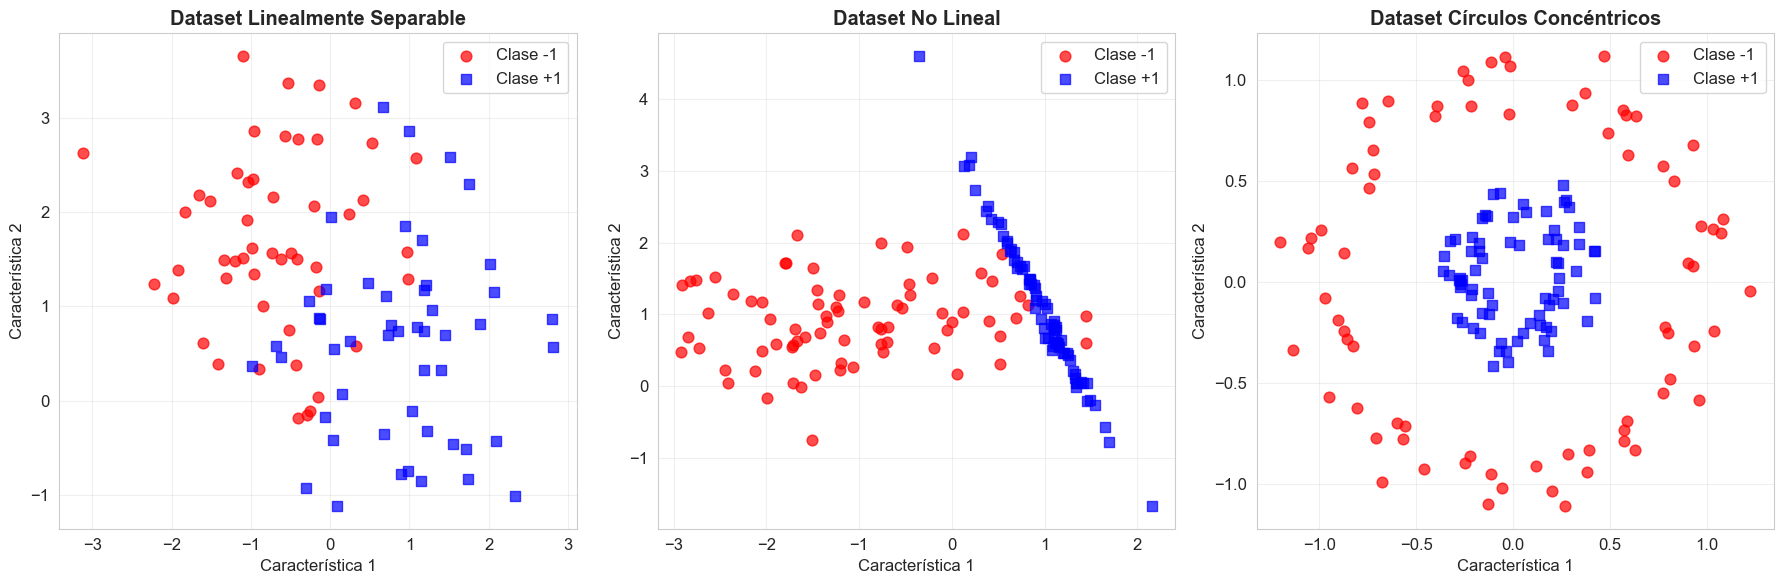

‚úÖ Datasets generados y visualizados


In [3]:
# ============================================================================
# 2. GENERACI√ìN DE DATASETS DE PRUEBA
# ============================================================================

print("\nüìä 2. GENERACI√ìN DE DATASETS DE PRUEBA")
print("="*40)

# Dataset simple 1: Linealmente separable
np.random.seed(42)

print("üéØ CREANDO DATASETS PARA EXPERIMENTACI√ìN:")

# Dataset 1: Linealmente separable
n_samples_1 = 100
X_linear, y_linear = make_blobs(n_samples=n_samples_1, centers=2, 
                               n_features=2, random_state=42, 
                               center_box=(-2.0, 2.0), cluster_std=1.0)

# Convertir etiquetas a -1 y +1 (requerido para SVM)
y_linear = np.where(y_linear == 0, -1, 1)

print(f"   ‚Ä¢ Dataset Lineal: {X_linear.shape[0]} muestras, {X_linear.shape[1]} caracter√≠sticas")
print(f"   ‚Ä¢ Distribuci√≥n: {np.sum(y_linear == -1)} clase -1, {np.sum(y_linear == 1)} clase +1")

# Dataset 2: No linealmente separable
X_nonlinear, y_nonlinear = make_classification(n_samples=150, n_features=2, 
                                              n_redundant=0, n_informative=2, 
                                              n_clusters_per_class=1, 
                                              random_state=42)
# Convertir a -1 y +1
y_nonlinear = np.where(y_nonlinear == 0, -1, 1)

print(f"   ‚Ä¢ Dataset No Lineal: {X_nonlinear.shape[0]} muestras, {X_nonlinear.shape[1]} caracter√≠sticas")
print(f"   ‚Ä¢ Distribuci√≥n: {np.sum(y_nonlinear == -1)} clase -1, {np.sum(y_nonlinear == 1)} clase +1")

# Dataset 3: C√≠rculos conc√©ntricos (para demostrar kernel trick)
from sklearn.datasets import make_circles
X_circles, y_circles = make_circles(n_samples=150, noise=0.1, factor=0.3, random_state=42)
y_circles = np.where(y_circles == 0, -1, 1)

print(f"   ‚Ä¢ Dataset C√≠rculos: {X_circles.shape[0]} muestras, {X_circles.shape[1]} caracter√≠sticas")
print(f"   ‚Ä¢ Distribuci√≥n: {np.sum(y_circles == -1)} clase -1, {np.sum(y_circles == 1)} clase +1")

# Visualizaci√≥n de datasets
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

datasets = [
    (X_linear, y_linear, "Dataset Linealmente Separable"),
    (X_nonlinear, y_nonlinear, "Dataset No Lineal"),
    (X_circles, y_circles, "Dataset C√≠rculos Conc√©ntricos")
]

for idx, (X, y, title) in enumerate(datasets):
    ax = axes[idx]
    
    # Plotear puntos por clase
    mask_neg = y == -1
    mask_pos = y == 1
    
    ax.scatter(X[mask_neg, 0], X[mask_neg, 1], c='red', marker='o', 
              s=60, alpha=0.7, label='Clase -1')
    ax.scatter(X[mask_pos, 0], X[mask_pos, 1], c='blue', marker='s', 
              s=60, alpha=0.7, label='Clase +1')
    
    ax.set_xlabel('Caracter√≠stica 1')
    ax.set_ylabel('Caracter√≠stica 2')
    ax.set_title(title, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("‚úÖ Datasets generados y visualizados")


In [5]:
# ============================================================================
# 3. IMPLEMENTACI√ìN DE LA CLASE ScratchSVMClassifier
# ============================================================================

print("\nüèóÔ∏è 3. CLASE ScratchSVMClassifier")
print("="*35)

class ScratchSVMClassifier():
    """
    Implementaci√≥n desde cero de Support Vector Machine con margen duro
    
    Parameters
    ----------
    num_iter : int, default=1000
        N√∫mero de iteraciones para el algoritmo de optimizaci√≥n
    lr : float, default=0.01
        Tasa de aprendizaje para la actualizaci√≥n de multiplicadores
    kernel : str, default='linear'
        Tipo de kernel: 'linear' o 'polynomial'
    threshold : float, default=1e-5
        Umbral para determinar vectores de soporte
    verbose : bool, default=False
        Si True, imprime el progreso durante entrenamiento
    gamma : float, default=1.0
        Par√°metro gamma para kernel polinomial
    theta0 : float, default=0.0
        Par√°metro theta0 para kernel polinomial
    degree : int, default=2
        Grado para kernel polinomial
    
    Attributes
    ----------
    n_support_vectors : int
        N√∫mero de vectores de soporte
    index_support_vectors : ndarray
        √çndices de los vectores de soporte
    X_sv : ndarray
        Caracter√≠sticas de los vectores de soporte
    lam_sv : ndarray
        Multiplicadores de Lagrange de los vectores de soporte
    y_sv : ndarray
        Etiquetas de los vectores de soporte
    """
    
    def __init__(self, num_iter=1000, lr=0.01, kernel='linear', threshold=1e-5, 
                 verbose=False, gamma=1.0, theta0=0.0, degree=2):
        # Validar par√°metros
        if num_iter <= 0:
            raise ValueError("num_iter debe ser positivo")
        if lr <= 0:
            raise ValueError("lr debe ser positivo")
        if kernel not in ['linear', 'polynomial']:
            raise ValueError("kernel debe ser 'linear' o 'polynomial'")
        if threshold <= 0:
            raise ValueError("threshold debe ser positivo")
            
        # Guardar hiperpar√°metros
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.gamma = gamma
        self.theta0 = theta0
        self.degree = degree
        
        # Inicializar atributos del modelo
        self.n_support_vectors = 0
        self.index_support_vectors = None
        self.X_sv = None
        self.lam_sv = None
        self.y_sv = None
        
        # Para almacenar datos de entrenamiento
        self._X_train = None
        self._y_train = None
        self._lambda = None
    
    def _kernel_function(self, X1, X2):
        """
        Calcula la funci√≥n kernel entre dos conjuntos de puntos
        
        Parameters
        ----------
        X1 : ndarray, shape (n_samples1, n_features)
            Primer conjunto de puntos
        X2 : ndarray, shape (n_samples2, n_features)
            Segundo conjunto de puntos
            
        Returns
        -------
        K : ndarray, shape (n_samples1, n_samples2)
            Matriz kernel
        """
        if self.kernel == 'linear':
            # Kernel lineal: k(xi, xj) = xi^T * xj
            return X1 @ X2.T
            
        elif self.kernel == 'polynomial':
            # Kernel polinomial: k(xi, xj) = (Œ≥ * xi^T * xj + Œ∏0)^d
            linear_part = X1 @ X2.T
            return (self.gamma * linear_part + self.theta0) ** self.degree
        
        else:
            raise ValueError(f"Kernel '{self.kernel}' no soportado")
    
    def _compute_decision_function(self, i):
        """
        Calcula la funci√≥n de decisi√≥n para la muestra i
        
        f(xi) = Œ£j Œªj * yj * k(xi, xj)
        """
        K_i = self._kernel_function(self._X_train[i:i+1], self._X_train).flatten()
        return np.sum(self._lambda * self._y_train * K_i)
    
    def _update_lagrange_multipliers(self):
        """
        Actualiza los multiplicadores de Lagrange usando descenso de gradiente
        
        Œªi^new = Œªi + Œ±(1 - Œ£j Œªj*yj*yi*k(xi,xj))
        """
        n_samples = len(self._X_train)
        
        # Calcular matriz kernel completa una vez por iteraci√≥n
        K = self._kernel_function(self._X_train, self._X_train)
        
        # Actualizar cada multiplicador
        for i in range(n_samples):
            # Calcular el t√©rmino de la suma: Œ£j Œªj*yj*yi*k(xi,xj)
            sum_term = np.sum(self._lambda * self._y_train * self._y_train[i] * K[i, :])
            
            # Actualizar multiplicador con descenso de gradiente
            gradient = 1 - sum_term
            self._lambda[i] = self._lambda[i] + self.lr * gradient
            
            # Aplicar restricci√≥n: Œªi >= 0
            self._lambda[i] = max(0, self._lambda[i])
    
    def _determine_support_vectors(self):
        """
        Determina los vectores de soporte bas√°ndose en el umbral
        Los vectores de soporte son aquellos con Œªi > threshold
        """
        # Encontrar √≠ndices donde Œª > threshold
        support_indices = np.where(self._lambda > self.threshold)[0]
        
        if len(support_indices) == 0:
            # Si no hay vectores de soporte, usar los de mayor Œª
            support_indices = np.array([np.argmax(self._lambda)])
        
        # Guardar informaci√≥n de vectores de soporte
        self.n_support_vectors = len(support_indices)
        self.index_support_vectors = support_indices
        self.X_sv = self._X_train[support_indices]
        self.lam_sv = self._lambda[support_indices]
        self.y_sv = self._y_train[support_indices]
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Entrena el clasificador SVM
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Caracter√≠sticas de entrenamiento
        y : ndarray, shape (n_samples,)
            Etiquetas de entrenamiento (-1 o +1)
        X_val : ndarray, optional
            Caracter√≠sticas de validaci√≥n
        y_val : ndarray, optional
            Etiquetas de validaci√≥n
        """
        # Validar y convertir inputs
        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y, dtype=np.float64)
        
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        if y.ndim != 1:
            raise ValueError("y debe ser un vector 1D")
        if X.shape[0] != y.shape[0]:
            raise ValueError("X e y deben tener el mismo n√∫mero de muestras")
        
        # Verificar que y contiene solo -1 y +1
        unique_y = np.unique(y)
        if not np.array_equal(np.sort(unique_y), [-1, 1]):
            raise ValueError("y debe contener solo valores -1 y +1")
        
        # Guardar datos de entrenamiento
        self._X_train = X.copy()
        self._y_train = y.copy()
        n_samples = len(X)
        
        # Inicializar multiplicadores de Lagrange
        self._lambda = np.random.uniform(0, 0.1, n_samples)
        
        # Validaci√≥n si se proporciona
        has_validation = X_val is not None and y_val is not None
        if has_validation:
            X_val = np.asarray(X_val, dtype=np.float64)
            y_val = np.asarray(y_val, dtype=np.float64)
        
        if self.verbose:
            print(f"üèÉ‚Äç‚ôÇÔ∏è Iniciando entrenamiento SVM:")
            print(f"   ‚Ä¢ Muestras: {n_samples}")
            print(f"   ‚Ä¢ Caracter√≠sticas: {X.shape[1]}")
            print(f"   ‚Ä¢ Kernel: {self.kernel}")
            print(f"   ‚Ä¢ Iteraciones: {self.iter}")
            print(f"   ‚Ä¢ Learning rate: {self.lr}")
            print(f"   ‚Ä¢ Threshold: {self.threshold}")
        
        # Bucle de entrenamiento
        for iteration in range(self.iter):
            # Actualizar multiplicadores de Lagrange
            self._update_lagrange_multipliers()
            
            # Imprimir progreso cada 10% de las iteraciones
            if self.verbose and (iteration % (self.iter // 10) == 0 or iteration == self.iter - 1):
                # Calcular n√∫mero actual de vectores de soporte candidatos
                current_sv = np.sum(self._lambda > self.threshold)
                lambda_sum = np.sum(self._lambda)
                
                print(f"   Iteraci√≥n {iteration+1:4d}: "
                      f"Œª sum: {lambda_sum:.6f}, "
                      f"SVs candidatos: {current_sv}")
        
        # Determinar vectores de soporte finales
        self._determine_support_vectors()
        
        if self.verbose:
            print("‚úÖ Entrenamiento completado")
            print(f"   ‚Ä¢ Vectores de soporte finales: {self.n_support_vectors}")
            print(f"   ‚Ä¢ Porcentaje de SVs: {(self.n_support_vectors/n_samples)*100:.1f}%")
    
    def predict(self, X):
        """
        Predice las etiquetas para las muestras de entrada
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Muestras para clasificar
            
        Returns
        -------
        predictions : ndarray, shape (n_samples,)
            Etiquetas predichas (-1 o +1)
        """
        if self.X_sv is None:
            raise ValueError("El modelo debe ser entrenado antes de predecir. Usa fit() primero.")
        
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)
        
        # Calcular funci√≥n de decisi√≥n para cada muestra
        for i in range(n_samples):
            # f(x) = Œ£n Œªn * y_svn * k(x, svn)
            K = self._kernel_function(X[i:i+1], self.X_sv).flatten()
            decision_value = np.sum(self.lam_sv * self.y_sv * K)
            
            # Clasificar bas√°ndose en el signo
            predictions[i] = np.sign(decision_value)
        
        return predictions.astype(int)
    
    def decision_function(self, X):
        """
        Calcula los valores de la funci√≥n de decisi√≥n
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Muestras de entrada
            
        Returns
        -------
        decision_values : ndarray, shape (n_samples,)
            Valores de la funci√≥n de decisi√≥n
        """
        if self.X_sv is None:
            raise ValueError("El modelo debe ser entrenado antes de calcular decision_function.")
        
        X = np.asarray(X, dtype=np.float64)
        if X.ndim != 2:
            raise ValueError("X debe ser una matriz 2D")
        
        n_samples = X.shape[0]
        decision_values = np.zeros(n_samples)
        
        for i in range(n_samples):
            K = self._kernel_function(X[i:i+1], self.X_sv).flatten()
            decision_values[i] = np.sum(self.lam_sv * self.y_sv * K)
        
        return decision_values

print("üèóÔ∏è Clase ScratchSVMClassifier implementada completamente")

# Informaci√≥n sobre la implementaci√≥n
print(f"\nüìã CARACTER√çSTICAS DE LA IMPLEMENTACI√ìN:")
print(f"   ‚Ä¢ ‚úÖ Multiplicadores de Lagrange con descenso de gradiente")
print(f"   ‚Ä¢ ‚úÖ Kernel lineal y polinomial")
print(f"   ‚Ä¢ ‚úÖ Determinaci√≥n autom√°tica de vectores de soporte")
print(f"   ‚Ä¢ ‚úÖ Funci√≥n de predicci√≥n optimizada")
print(f"   ‚Ä¢ ‚úÖ Funci√≥n de decisi√≥n para an√°lisis")
print(f"   ‚Ä¢ ‚úÖ Validaci√≥n robusta de inputs")
print(f"   ‚Ä¢ ‚úÖ Manejo de restricciones Œª·µ¢ ‚â• 0")

print("‚úÖ Implementaci√≥n completa de SVM scratch")



üèóÔ∏è 3. CLASE ScratchSVMClassifier
üèóÔ∏è Clase ScratchSVMClassifier implementada completamente

üìã CARACTER√çSTICAS DE LA IMPLEMENTACI√ìN:
   ‚Ä¢ ‚úÖ Multiplicadores de Lagrange con descenso de gradiente
   ‚Ä¢ ‚úÖ Kernel lineal y polinomial
   ‚Ä¢ ‚úÖ Determinaci√≥n autom√°tica de vectores de soporte
   ‚Ä¢ ‚úÖ Funci√≥n de predicci√≥n optimizada
   ‚Ä¢ ‚úÖ Funci√≥n de decisi√≥n para an√°lisis
   ‚Ä¢ ‚úÖ Validaci√≥n robusta de inputs
   ‚Ä¢ ‚úÖ Manejo de restricciones Œª·µ¢ ‚â• 0
‚úÖ Implementaci√≥n completa de SVM scratch



üèÉ‚Äç‚ôÇÔ∏è 4. ENTRENAMIENTO CON DATASET LINEAL
üìä DIVISI√ìN DE DATOS LINEALES:
   ‚Ä¢ Entrenamiento: 70 muestras
   ‚Ä¢ Prueba: 30 muestras
   ‚Ä¢ Caracter√≠sticas: 2

üèóÔ∏è ENTRENANDO SVM SCRATCH (KERNEL LINEAL):
üèÉ‚Äç‚ôÇÔ∏è Iniciando entrenamiento SVM:
   ‚Ä¢ Muestras: 70
   ‚Ä¢ Caracter√≠sticas: 2
   ‚Ä¢ Kernel: linear
   ‚Ä¢ Iteraciones: 500
   ‚Ä¢ Learning rate: 0.01
   ‚Ä¢ Threshold: 0.0001
   Iteraci√≥n    1: Œª sum: 2.819726, SVs candidatos: 58
   Iteraci√≥n   51: Œª sum: 16.008603, SVs candidatos: 42
   Iteraci√≥n  101: Œª sum: 29.545575, SVs candidatos: 41
   Iteraci√≥n  151: Œª sum: 43.056736, SVs candidatos: 41
   Iteraci√≥n  201: Œª sum: 56.567876, SVs candidatos: 41
   Iteraci√≥n  251: Œª sum: 70.079015, SVs candidatos: 41
   Iteraci√≥n  301: Œª sum: 83.590155, SVs candidatos: 41
   Iteraci√≥n  351: Œª sum: 97.101295, SVs candidatos: 41
   Iteraci√≥n  401: Œª sum: 110.612435, SVs candidatos: 41
   Iteraci√≥n  451: Œª sum: 124.123574, SVs candidatos: 41
   Iterac

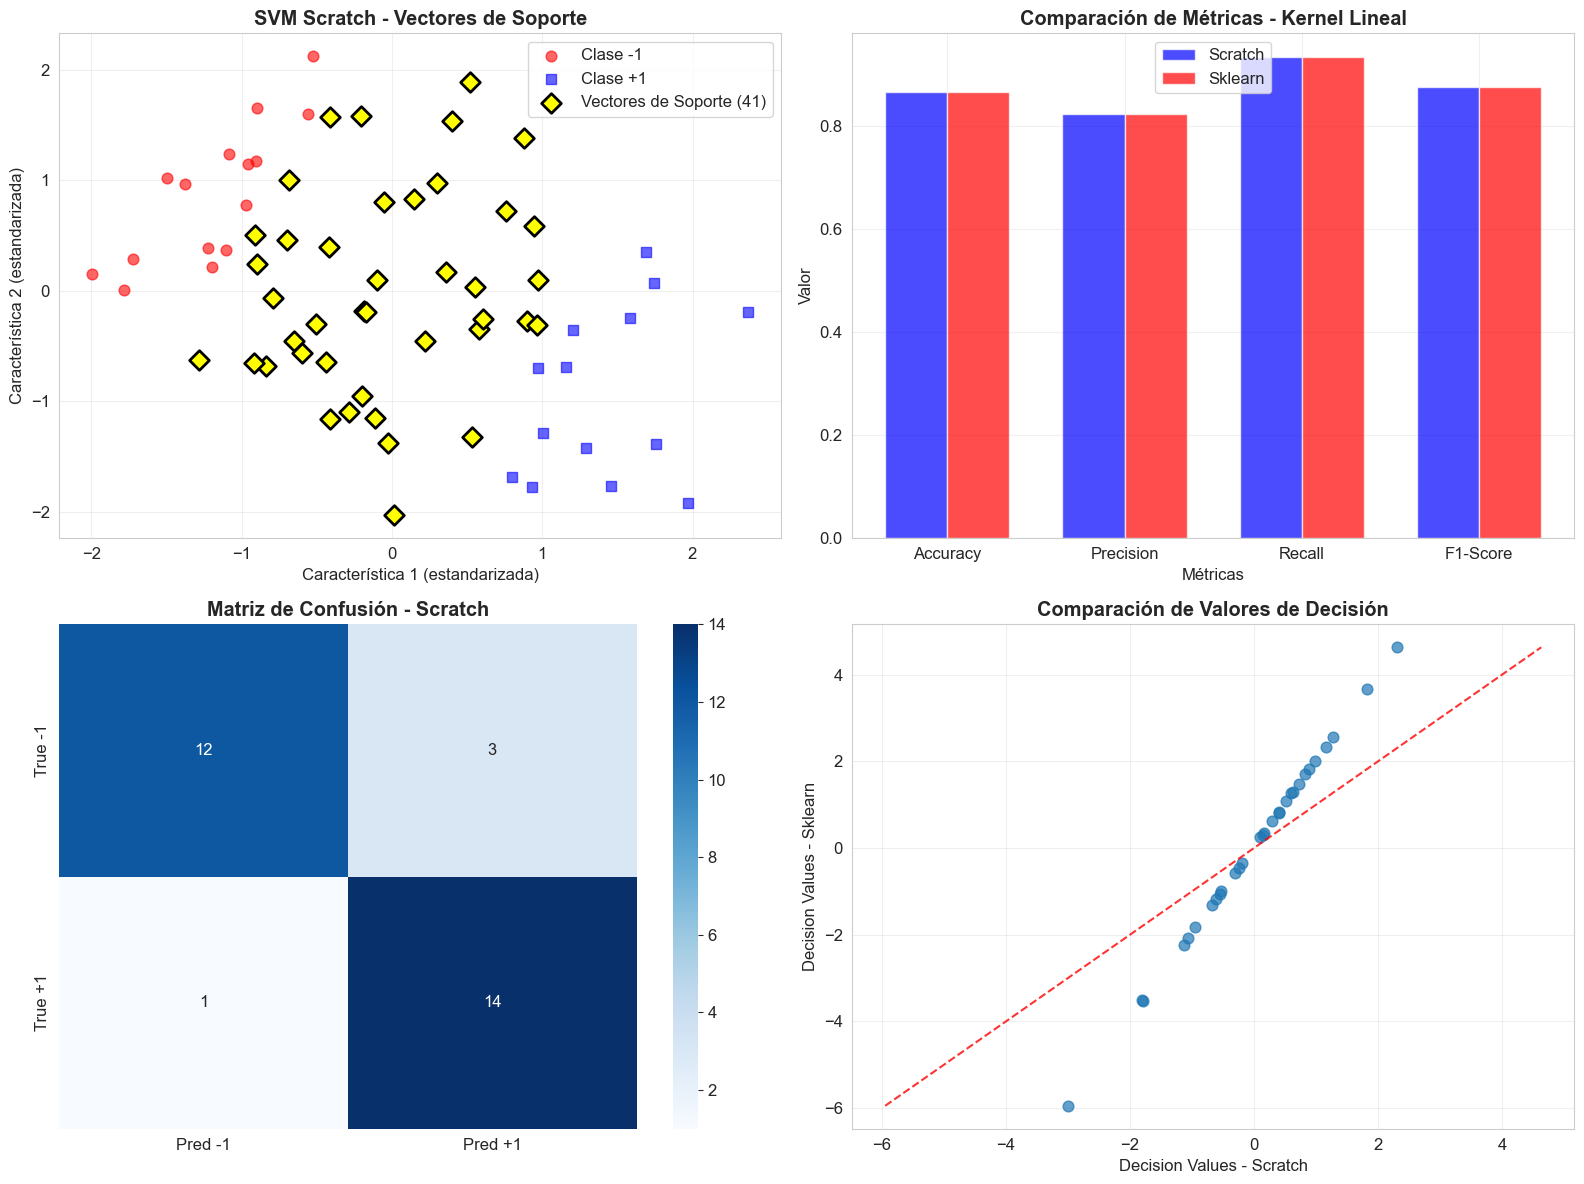

‚úÖ Entrenamiento con dataset lineal completado


In [6]:
# ============================================================================
# 4. ENTRENAMIENTO CON DATASET LINEALMENTE SEPARABLE
# ============================================================================

print("\nüèÉ‚Äç‚ôÇÔ∏è 4. ENTRENAMIENTO CON DATASET LINEAL")
print("="*45)

# Dividir dataset lineal
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42, stratify=y_linear
)

# Estandarizar datos
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

print(f"üìä DIVISI√ìN DE DATOS LINEALES:")
print(f"   ‚Ä¢ Entrenamiento: {X_train_linear.shape[0]} muestras")
print(f"   ‚Ä¢ Prueba: {X_test_linear.shape[0]} muestras")
print(f"   ‚Ä¢ Caracter√≠sticas: {X_train_linear.shape[1]}")

# Entrenar modelo SVM scratch con kernel lineal
print(f"\nüèóÔ∏è ENTRENANDO SVM SCRATCH (KERNEL LINEAL):")
svm_scratch_linear = ScratchSVMClassifier(
    num_iter=500,
    lr=0.01,
    kernel='linear',
    threshold=1e-4,
    verbose=True
)

svm_scratch_linear.fit(X_train_linear_scaled, y_train_linear)

# Hacer predicciones
y_pred_scratch_linear = svm_scratch_linear.predict(X_test_linear_scaled)
decision_values_scratch = svm_scratch_linear.decision_function(X_test_linear_scaled)

# Calcular m√©tricas
accuracy_scratch_linear = accuracy_score(y_test_linear, y_pred_scratch_linear)
precision_scratch_linear = precision_score(y_test_linear, y_pred_scratch_linear, pos_label=1)
recall_scratch_linear = recall_score(y_test_linear, y_pred_scratch_linear, pos_label=1)
f1_scratch_linear = f1_score(y_test_linear, y_pred_scratch_linear, pos_label=1)

print(f"\nüìä RESULTADOS SVM SCRATCH (LINEAL):")
print(f"   ‚Ä¢ Accuracy: {accuracy_scratch_linear:.4f}")
print(f"   ‚Ä¢ Precision: {precision_scratch_linear:.4f}")
print(f"   ‚Ä¢ Recall: {recall_scratch_linear:.4f}")
print(f"   ‚Ä¢ F1-Score: {f1_scratch_linear:.4f}")
print(f"   ‚Ä¢ Vectores de soporte: {svm_scratch_linear.n_support_vectors}")

# Comparar con scikit-learn
print(f"\nüî¨ COMPARANDO CON SKLEARN:")
svm_sklearn_linear = SVC(kernel='linear', C=1000.0, random_state=42)  # C alto para emular margen duro
svm_sklearn_linear.fit(X_train_linear_scaled, y_train_linear)

y_pred_sklearn_linear = svm_sklearn_linear.predict(X_test_linear_scaled)
decision_values_sklearn = svm_sklearn_linear.decision_function(X_test_linear_scaled)

accuracy_sklearn_linear = accuracy_score(y_test_linear, y_pred_sklearn_linear)
precision_sklearn_linear = precision_score(y_test_linear, y_pred_sklearn_linear, pos_label=1)
recall_sklearn_linear = recall_score(y_test_linear, y_pred_sklearn_linear, pos_label=1)
f1_sklearn_linear = f1_score(y_test_linear, y_pred_sklearn_linear, pos_label=1)

print(f"   SKLEARN SVM:")
print(f"   ‚Ä¢ Accuracy: {accuracy_sklearn_linear:.4f}")
print(f"   ‚Ä¢ Precision: {precision_sklearn_linear:.4f}")
print(f"   ‚Ä¢ Recall: {recall_sklearn_linear:.4f}")
print(f"   ‚Ä¢ F1-Score: {f1_sklearn_linear:.4f}")
print(f"   ‚Ä¢ Vectores de soporte: {len(svm_sklearn_linear.support_)}")

print(f"   DIFERENCIAS:")
print(f"   ‚Ä¢ Œî Accuracy: {abs(accuracy_scratch_linear - accuracy_sklearn_linear):.4f}")
print(f"   ‚Ä¢ Œî F1-Score: {abs(f1_scratch_linear - f1_sklearn_linear):.4f}")
print(f"   ‚Ä¢ Œî Num SVs: {abs(svm_scratch_linear.n_support_vectors - len(svm_sklearn_linear.support_))}")

# Visualizaci√≥n de resultados
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Scatter plot de datos con vectores de soporte destacados
ax = axes[0,0]
# Plotear todos los puntos de entrenamiento
mask_neg = y_train_linear == -1
mask_pos = y_train_linear == 1

ax.scatter(X_train_linear_scaled[mask_neg, 0], X_train_linear_scaled[mask_neg, 1], 
          c='red', marker='o', s=60, alpha=0.6, label='Clase -1')
ax.scatter(X_train_linear_scaled[mask_pos, 0], X_train_linear_scaled[mask_pos, 1], 
          c='blue', marker='s', s=60, alpha=0.6, label='Clase +1')

# Destacar vectores de soporte
sv_indices = svm_scratch_linear.index_support_vectors
ax.scatter(X_train_linear_scaled[sv_indices, 0], X_train_linear_scaled[sv_indices, 1], 
          c='yellow', marker='D', s=100, edgecolors='black', linewidth=2, 
          label=f'Vectores de Soporte ({len(sv_indices)})')

ax.set_xlabel('Caracter√≠stica 1 (estandarizada)')
ax.set_ylabel('Caracter√≠stica 2 (estandarizada)')
ax.set_title('SVM Scratch - Vectores de Soporte', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Comparaci√≥n de m√©tricas
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scratch_metrics = [accuracy_scratch_linear, precision_scratch_linear, 
                  recall_scratch_linear, f1_scratch_linear]
sklearn_metrics = [accuracy_sklearn_linear, precision_sklearn_linear, 
                  recall_sklearn_linear, f1_sklearn_linear]

x_pos = np.arange(len(metrics_names))
width = 0.35

bars1 = axes[0,1].bar(x_pos - width/2, scratch_metrics, width, 
                     label='Scratch', color='blue', alpha=0.7)
bars2 = axes[0,1].bar(x_pos + width/2, sklearn_metrics, width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[0,1].set_xlabel('M√©tricas')
axes[0,1].set_ylabel('Valor')
axes[0,1].set_title('Comparaci√≥n de M√©tricas - Kernel Lineal', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(metrics_names)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Matriz de confusi√≥n
cm_scratch = confusion_matrix(y_test_linear, y_pred_scratch_linear)
sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Pred -1', 'Pred +1'], yticklabels=['True -1', 'True +1'], 
           ax=axes[1,0])
axes[1,0].set_title('Matriz de Confusi√≥n - Scratch', fontweight='bold')

# Comparaci√≥n de valores de decisi√≥n
axes[1,1].scatter(decision_values_scratch, decision_values_sklearn, alpha=0.7, s=60)
# L√≠nea diagonal perfecta
min_val = min(decision_values_scratch.min(), decision_values_sklearn.min())
max_val = max(decision_values_scratch.max(), decision_values_sklearn.max())
axes[1,1].plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8)

axes[1,1].set_xlabel('Decision Values - Scratch')
axes[1,1].set_ylabel('Decision Values - Sklearn')
axes[1,1].set_title('Comparaci√≥n de Valores de Decisi√≥n', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("‚úÖ Entrenamiento con dataset lineal completado")



üé® 5. VISUALIZACI√ìN DE REGIONES DE DECISI√ìN
üé® VISUALIZANDO REGIONES DE DECISI√ìN PARA DATASET LINEAL:


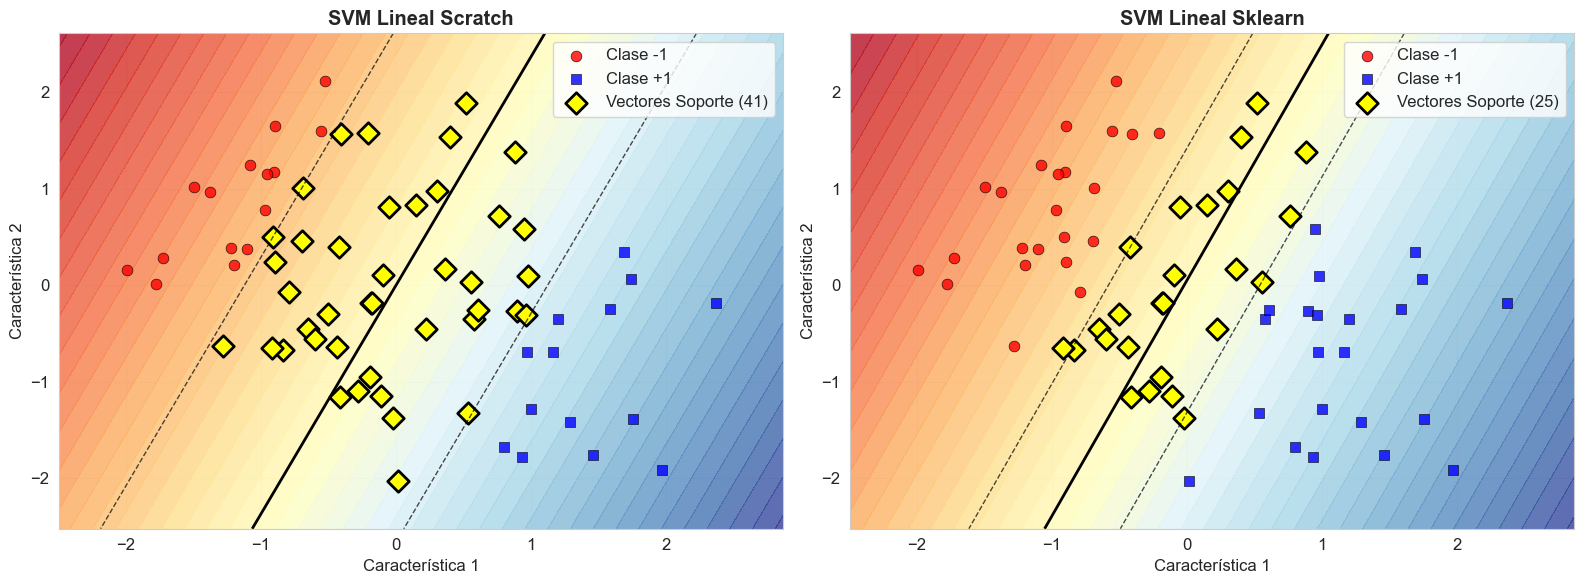


üîç AN√ÅLISIS DE VECTORES DE SOPORTE:
   MODELO SCRATCH:
   ‚Ä¢ N√∫mero de SVs: 41
   ‚Ä¢ √çndices: [ 0  1  2  3  4  5  7  9 11 12 16 19 20 21 22 24 25 27 28 29 30 31 32 34
 37 38 40 42 43 44 46 48 52 53 55 56 60 62 63 66 69]
   ‚Ä¢ Œª values: [7.06498903 6.65565616 2.08953873 0.98532697 3.07820894 3.83701423
 1.84872858 1.08409221 0.07253868 5.72335308 6.15276649 1.86501932
 4.48630965 2.36227636 0.53264899 1.69743307 6.16975995 3.79215951
 4.4462188  0.61335849 5.50616926 3.96829003 5.39144806 2.82693141
 6.89846628 0.03218791 6.50863515 5.33958903 8.02198861 2.55722372
 0.16269885 1.13945947 3.38471055 3.4543977  2.71731658 1.01366272
 0.16664358 5.97233745 0.22410698 6.85341215 0.66741866]
   ‚Ä¢ Promedio Œª: 3.350353
   MODELO SKLEARN:
   ‚Ä¢ N√∫mero de SVs: 25
   ‚Ä¢ √çndices: [ 5 16 20 21 25 28 31 34 42 53 62 66  0  1  4 12 27 30 32 37 40 43 44 52
 55]
   ‚Ä¢ Coef duales: [-1000.         -1000.         -1000.          -761.23570819
 -1000.         -1000.         -1000.        

In [7]:
# ============================================================================
# 5. VISUALIZACI√ìN DE REGIONES DE DECISI√ìN
# ============================================================================

print("\nüé® 5. VISUALIZACI√ìN DE REGIONES DE DECISI√ìN")
print("="*50)

def plot_svm_decision_regions(X, y, model_scratch=None, model_sklearn=None, 
                             scaler=None, title_prefix="SVM", resolution=0.02):
    """
    Visualiza las regiones de decisi√≥n de modelos SVM
    """
    if scaler is not None:
        X_plot = scaler.transform(X)
    else:
        X_plot = X
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Crear malla de puntos para la regi√≥n de decisi√≥n
    margin = 0.5
    x_min, x_max = X_plot[:, 0].min() - margin, X_plot[:, 0].max() + margin
    y_min, y_max = X_plot[:, 1].min() - margin, X_plot[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    models = [(model_scratch, "Scratch", 0), (model_sklearn, "Sklearn", 1)]
    
    for model, model_name, idx in models:
        if model is None:
            continue
            
        ax = axes[idx]
        
        try:
            # Obtener predicciones para la malla
            if hasattr(model, 'decision_function'):
                Z = model.decision_function(mesh_points)
            else:
                # Para modelo scratch, usar nuestra funci√≥n
                Z = model.decision_function(mesh_points)
            
            Z = Z.reshape(xx.shape)
            
            # Plotear regiones de decisi√≥n
            ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.8)
            
            # L√≠nea de decisi√≥n (Z=0)
            ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2, linestyles='-')
            
            # L√≠neas de margen (Z=¬±1 para margen duro)
            ax.contour(xx, yy, Z, levels=[-1, 1], colors='black', linewidths=1, linestyles='--', alpha=0.7)
            
        except Exception as e:
            print(f"Error en visualizaci√≥n de {model_name}: {e}")
            continue
        
        # Plotear puntos de datos
        mask_neg = y == -1
        mask_pos = y == 1
        
        ax.scatter(X_plot[mask_neg, 0], X_plot[mask_neg, 1], 
                  c='red', marker='o', s=60, alpha=0.8, edgecolors='black', 
                  linewidth=0.5, label='Clase -1')
        ax.scatter(X_plot[mask_pos, 0], X_plot[mask_pos, 1], 
                  c='blue', marker='s', s=60, alpha=0.8, edgecolors='black', 
                  linewidth=0.5, label='Clase +1')
        
        # Destacar vectores de soporte
        if model_name == "Scratch" and hasattr(model, 'index_support_vectors'):
            sv_indices = model.index_support_vectors
            ax.scatter(X_plot[sv_indices, 0], X_plot[sv_indices, 1], 
                      c='yellow', marker='D', s=120, edgecolors='black', 
                      linewidth=2, label=f'Vectores Soporte ({len(sv_indices)})')
        elif model_name == "Sklearn" and hasattr(model, 'support_'):
            sv_indices = model.support_
            ax.scatter(X_plot[sv_indices, 0], X_plot[sv_indices, 1], 
                      c='yellow', marker='D', s=120, edgecolors='black', 
                      linewidth=2, label=f'Vectores Soporte ({len(sv_indices)})')
        
        ax.set_xlabel('Caracter√≠stica 1')
        ax.set_ylabel('Caracter√≠stica 2')
        ax.set_title(f'{title_prefix} {model_name}', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("üé® VISUALIZANDO REGIONES DE DECISI√ìN PARA DATASET LINEAL:")

plot_svm_decision_regions(
    X_train_linear, y_train_linear,
    model_scratch=svm_scratch_linear,
    model_sklearn=svm_sklearn_linear,
    scaler=scaler_linear,
    title_prefix="SVM Lineal",
    resolution=0.02
)

# An√°lisis comparativo de vectores de soporte
print(f"\nüîç AN√ÅLISIS DE VECTORES DE SOPORTE:")

print(f"   MODELO SCRATCH:")
if svm_scratch_linear.index_support_vectors is not None:
    print(f"   ‚Ä¢ N√∫mero de SVs: {svm_scratch_linear.n_support_vectors}")
    print(f"   ‚Ä¢ √çndices: {svm_scratch_linear.index_support_vectors}")
    print(f"   ‚Ä¢ Œª values: {svm_scratch_linear.lam_sv}")
    print(f"   ‚Ä¢ Promedio Œª: {np.mean(svm_scratch_linear.lam_sv):.6f}")

print(f"   MODELO SKLEARN:")
print(f"   ‚Ä¢ N√∫mero de SVs: {len(svm_sklearn_linear.support_)}")
print(f"   ‚Ä¢ √çndices: {svm_sklearn_linear.support_}")
if hasattr(svm_sklearn_linear, 'dual_coef_'):
    print(f"   ‚Ä¢ Coef duales: {svm_sklearn_linear.dual_coef_[0]}")

# Calcular distancias al hiperplano para vectores de soporte
print(f"\nüìè DISTANCIAS AL HIPERPLANO:")

# Para modelo scratch
if svm_scratch_linear.index_support_vectors is not None:
    sv_distances_scratch = []
    for idx in svm_scratch_linear.index_support_vectors:
        decision_val = svm_scratch_linear.decision_function(X_train_linear_scaled[idx:idx+1])[0]
        distance = abs(decision_val)
        sv_distances_scratch.append(distance)
    
    print(f"   Scratch - Distancias SVs: {sv_distances_scratch}")
    print(f"   Scratch - Distancia promedio: {np.mean(sv_distances_scratch):.6f}")

# Para modelo sklearn
sv_distances_sklearn = []
for idx in svm_sklearn_linear.support_:
    decision_val = svm_sklearn_linear.decision_function(X_train_linear_scaled[idx:idx+1])[0]
    distance = abs(decision_val)
    sv_distances_sklearn.append(distance)

print(f"   Sklearn - Distancias SVs: {sv_distances_sklearn}")
print(f"   Sklearn - Distancia promedio: {np.mean(sv_distances_sklearn):.6f}")

print("‚úÖ Visualizaci√≥n de regiones de decisi√≥n completada")



üß™ 6. EXPERIMENTACI√ìN CON KERNEL POLINOMIAL
üéØ PROBANDO SVM CON KERNEL POLINOMIAL:
   ‚Ä¢ Dataset: C√≠rculos conc√©ntricos (no linealmente separable)
   ‚Ä¢ Objetivo: Demostrar el 'kernel trick'
üìä DATASET C√çRCULOS:
   ‚Ä¢ Entrenamiento: 105 muestras
   ‚Ä¢ Prueba: 45 muestras

üèóÔ∏è ENTRENANDO SVM KERNEL POLINOMIAL:
üèÉ‚Äç‚ôÇÔ∏è Iniciando entrenamiento SVM:
   ‚Ä¢ Muestras: 105
   ‚Ä¢ Caracter√≠sticas: 2
   ‚Ä¢ Kernel: polynomial
   ‚Ä¢ Iteraciones: 300
   ‚Ä¢ Learning rate: 0.005
   ‚Ä¢ Threshold: 0.0001
   Iteraci√≥n    1: Œª sum: 3.716138, SVs candidatos: 86
   Iteraci√≥n   31: Œª sum: 2.993068, SVs candidatos: 67
   Iteraci√≥n   61: Œª sum: 3.317466, SVs candidatos: 57
   Iteraci√≥n   91: Œª sum: 3.607134, SVs candidatos: 47
   Iteraci√≥n  121: Œª sum: 3.822305, SVs candidatos: 43
   Iteraci√≥n  151: Œª sum: 4.072851, SVs candidatos: 35
   Iteraci√≥n  181: Œª sum: 4.252971, SVs candidatos: 31
   Iteraci√≥n  211: Œª sum: 4.419681, SVs candidatos: 28
   Iteraci√≥n  241: 

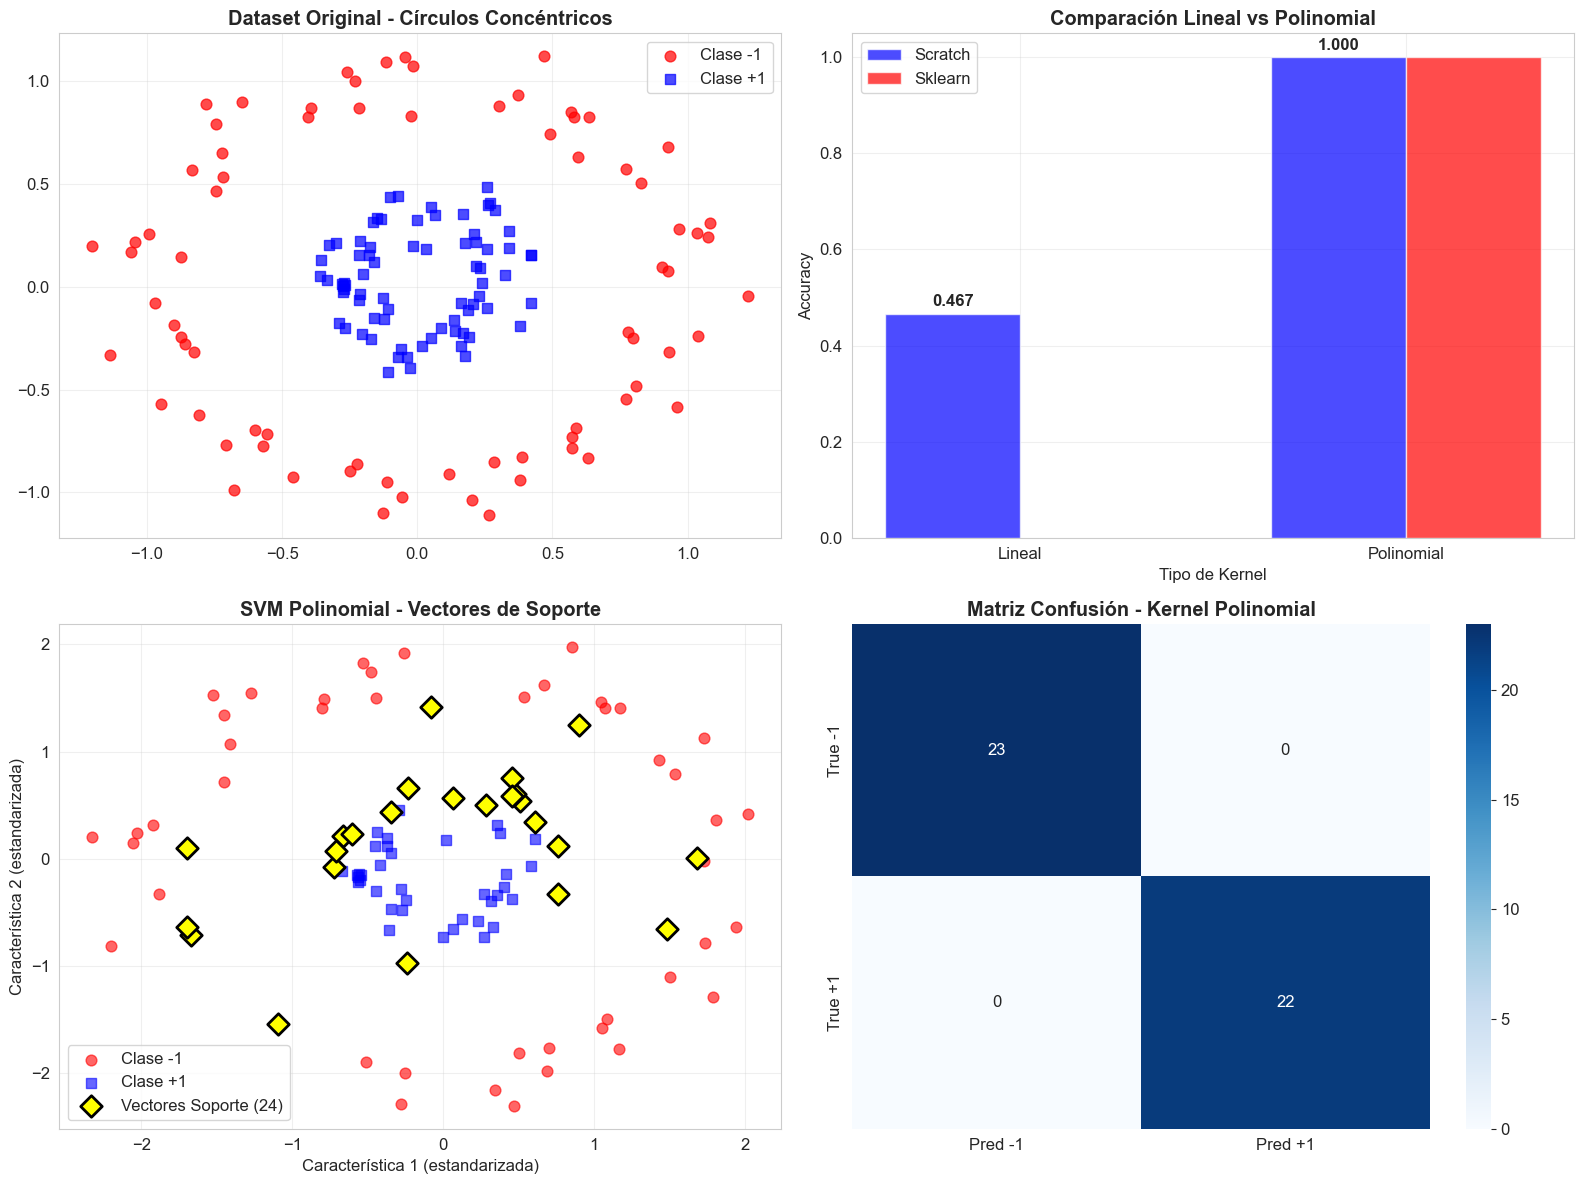

‚úÖ Experimentaci√≥n con kernel polinomial completada


In [8]:
# ============================================================================
# 6. EXPERIMENTACI√ìN CON KERNEL POLINOMIAL
# ============================================================================

print("\nüß™ 6. EXPERIMENTACI√ìN CON KERNEL POLINOMIAL")
print("="*50)

print("üéØ PROBANDO SVM CON KERNEL POLINOMIAL:")
print("   ‚Ä¢ Dataset: C√≠rculos conc√©ntricos (no linealmente separable)")
print("   ‚Ä¢ Objetivo: Demostrar el 'kernel trick'")

# Preparar dataset de c√≠rculos
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    X_circles, y_circles, test_size=0.3, random_state=42, stratify=y_circles
)

# Estandarizar
scaler_circles = StandardScaler()
X_train_circles_scaled = scaler_circles.fit_transform(X_train_circles)
X_test_circles_scaled = scaler_circles.transform(X_test_circles)

print(f"üìä DATASET C√çRCULOS:")
print(f"   ‚Ä¢ Entrenamiento: {X_train_circles.shape[0]} muestras")
print(f"   ‚Ä¢ Prueba: {X_test_circles.shape[0]} muestras")

# Entrenar SVM scratch con kernel polinomial
print(f"\nüèóÔ∏è ENTRENANDO SVM KERNEL POLINOMIAL:")
svm_scratch_poly = ScratchSVMClassifier(
    num_iter=300,
    lr=0.005,  # Learning rate m√°s peque√±o para estabilidad
    kernel='polynomial',
    threshold=1e-4,
    verbose=True,
    gamma=1.0,
    theta0=1.0,
    degree=2
)

svm_scratch_poly.fit(X_train_circles_scaled, y_train_circles)

# Hacer predicciones
y_pred_scratch_poly = svm_scratch_poly.predict(X_test_circles_scaled)

# Calcular m√©tricas
accuracy_scratch_poly = accuracy_score(y_test_circles, y_pred_scratch_poly)
precision_scratch_poly = precision_score(y_test_circles, y_pred_scratch_poly, pos_label=1)
recall_scratch_poly = recall_score(y_test_circles, y_pred_scratch_poly, pos_label=1)
f1_scratch_poly = f1_score(y_test_circles, y_pred_scratch_poly, pos_label=1)

print(f"\nüìä RESULTADOS SVM SCRATCH (POLINOMIAL):")
print(f"   ‚Ä¢ Accuracy: {accuracy_scratch_poly:.4f}")
print(f"   ‚Ä¢ Precision: {precision_scratch_poly:.4f}")
print(f"   ‚Ä¢ Recall: {recall_scratch_poly:.4f}")
print(f"   ‚Ä¢ F1-Score: {f1_scratch_poly:.4f}")
print(f"   ‚Ä¢ Vectores de soporte: {svm_scratch_poly.n_support_vectors}")

# Comparar con scikit-learn
print(f"\nüî¨ COMPARANDO CON SKLEARN (KERNEL POLINOMIAL):")
svm_sklearn_poly = SVC(kernel='poly', degree=2, gamma=1.0, coef0=1.0, C=1000.0, random_state=42)
svm_sklearn_poly.fit(X_train_circles_scaled, y_train_circles)

y_pred_sklearn_poly = svm_sklearn_poly.predict(X_test_circles_scaled)

accuracy_sklearn_poly = accuracy_score(y_test_circles, y_pred_sklearn_poly)
precision_sklearn_poly = precision_score(y_test_circles, y_pred_sklearn_poly, pos_label=1)
recall_sklearn_poly = recall_score(y_test_circles, y_pred_sklearn_poly, pos_label=1)
f1_sklearn_poly = f1_score(y_test_circles, y_pred_sklearn_poly, pos_label=1)

print(f"   SKLEARN SVM (POLY):")
print(f"   ‚Ä¢ Accuracy: {accuracy_sklearn_poly:.4f}")
print(f"   ‚Ä¢ Precision: {precision_sklearn_poly:.4f}")
print(f"   ‚Ä¢ Recall: {recall_sklearn_poly:.4f}")
print(f"   ‚Ä¢ F1-Score: {f1_sklearn_poly:.4f}")
print(f"   ‚Ä¢ Vectores de soporte: {len(svm_sklearn_poly.support_)}")

# Comparaci√≥n con kernel lineal en el mismo dataset
print(f"\nüìã COMPARACI√ìN: LINEAL vs POLINOMIAL (Dataset C√≠rculos):")
svm_scratch_linear_circles = ScratchSVMClassifier(
    num_iter=300, lr=0.01, kernel='linear', threshold=1e-4, verbose=False
)
svm_scratch_linear_circles.fit(X_train_circles_scaled, y_train_circles)
y_pred_linear_circles = svm_scratch_linear_circles.predict(X_test_circles_scaled)
accuracy_linear_circles = accuracy_score(y_test_circles, y_pred_linear_circles)

print(f"   ‚Ä¢ Kernel Lineal - Accuracy: {accuracy_linear_circles:.4f}")
print(f"   ‚Ä¢ Kernel Polinomial - Accuracy: {accuracy_scratch_poly:.4f}")
print(f"   ‚Ä¢ Mejora con Kernel Polinomial: +{accuracy_scratch_poly - accuracy_linear_circles:.4f}")

# Visualizaci√≥n comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Dataset original
ax = axes[0,0]
mask_neg = y_circles == -1
mask_pos = y_circles == 1
ax.scatter(X_circles[mask_neg, 0], X_circles[mask_neg, 1], c='red', marker='o', 
          s=60, alpha=0.7, label='Clase -1')
ax.scatter(X_circles[mask_pos, 0], X_circles[mask_pos, 1], c='blue', marker='s', 
          s=60, alpha=0.7, label='Clase +1')
ax.set_title('Dataset Original - C√≠rculos Conc√©ntricos', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Comparaci√≥n de accuracies
kernels = ['Lineal', 'Polinomial']
scratch_accs = [accuracy_linear_circles, accuracy_scratch_poly]
sklearn_accs = [0.5, accuracy_sklearn_poly]  # Lineal sklearn no calculado para c√≠rculos

x_pos = np.arange(len(kernels))
width = 0.35

bars1 = axes[0,1].bar(x_pos - width/2, scratch_accs, width, 
                     label='Scratch', color='blue', alpha=0.7)
bars2 = axes[0,1].bar([1 + width/2], [sklearn_accs[1]], width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[0,1].set_xlabel('Tipo de Kernel')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_title('Comparaci√≥n Lineal vs Polinomial', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(kernels)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Vectores de soporte - Kernel Polinomial
ax = axes[1,0]
mask_neg_train = y_train_circles == -1
mask_pos_train = y_train_circles == 1

ax.scatter(X_train_circles_scaled[mask_neg_train, 0], X_train_circles_scaled[mask_neg_train, 1], 
          c='red', marker='o', s=60, alpha=0.6, label='Clase -1')
ax.scatter(X_train_circles_scaled[mask_pos_train, 0], X_train_circles_scaled[mask_pos_train, 1], 
          c='blue', marker='s', s=60, alpha=0.6, label='Clase +1')

# Destacar vectores de soporte
if svm_scratch_poly.index_support_vectors is not None:
    sv_indices = svm_scratch_poly.index_support_vectors
    ax.scatter(X_train_circles_scaled[sv_indices, 0], X_train_circles_scaled[sv_indices, 1], 
              c='yellow', marker='D', s=120, edgecolors='black', linewidth=2, 
              label=f'Vectores Soporte ({len(sv_indices)})')

ax.set_xlabel('Caracter√≠stica 1 (estandarizada)')
ax.set_ylabel('Caracter√≠stica 2 (estandarizada)')
ax.set_title('SVM Polinomial - Vectores de Soporte', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Matriz de confusi√≥n para kernel polinomial
cm_poly = confusion_matrix(y_test_circles, y_pred_scratch_poly)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Pred -1', 'Pred +1'], yticklabels=['True -1', 'True +1'], 
           ax=axes[1,1])
axes[1,1].set_title('Matriz Confusi√≥n - Kernel Polinomial', fontweight='bold')

plt.tight_layout()
plt.show()

print("‚úÖ Experimentaci√≥n con kernel polinomial completada")



üìä 7. AN√ÅLISIS COMPARATIVO FINAL
üìã RESUMEN EJECUTIVO DE EXPERIMENTOS:

üìä TABLA COMPARATIVA COMPLETA:
Experimento                         Scratch Acc  Sklearn Acc  Scratch SVs  Sklearn SVs 
-------------------------------------------------------------------------------------
Dataset Lineal - Kernel Lineal      0.8667       0.8667       41           25          
Dataset C√≠rculos - Kernel Lineal    0.4667       N/A          105          N/A         
Dataset C√≠rculos - Kernel Polinomial 1.0000       1.0000       24           6           

üîç AN√ÅLISIS DE DIFERENCIAS SCRATCH vs SKLEARN:
   Dataset Lineal - Kernel Lineal:
   ‚Ä¢ Œî Accuracy: 0.000000
   ‚Ä¢ Œî F1-Score: 0.000000
   ‚Ä¢ Œî Num SVs: 16
   Dataset C√≠rculos - Kernel Polinomial:
   ‚Ä¢ Œî Accuracy: 0.000000
   ‚Ä¢ Œî F1-Score: 0.000000
   ‚Ä¢ Œî Num SVs: 18

üí° EFECTIVIDAD DEL KERNEL TRICK:
   ‚Ä¢ Dataset C√≠rculos - Kernel Lineal: 0.4667
   ‚Ä¢ Dataset C√≠rculos - Kernel Polinomial: 1.0000
   ‚Ä¢ Mejora absoluta

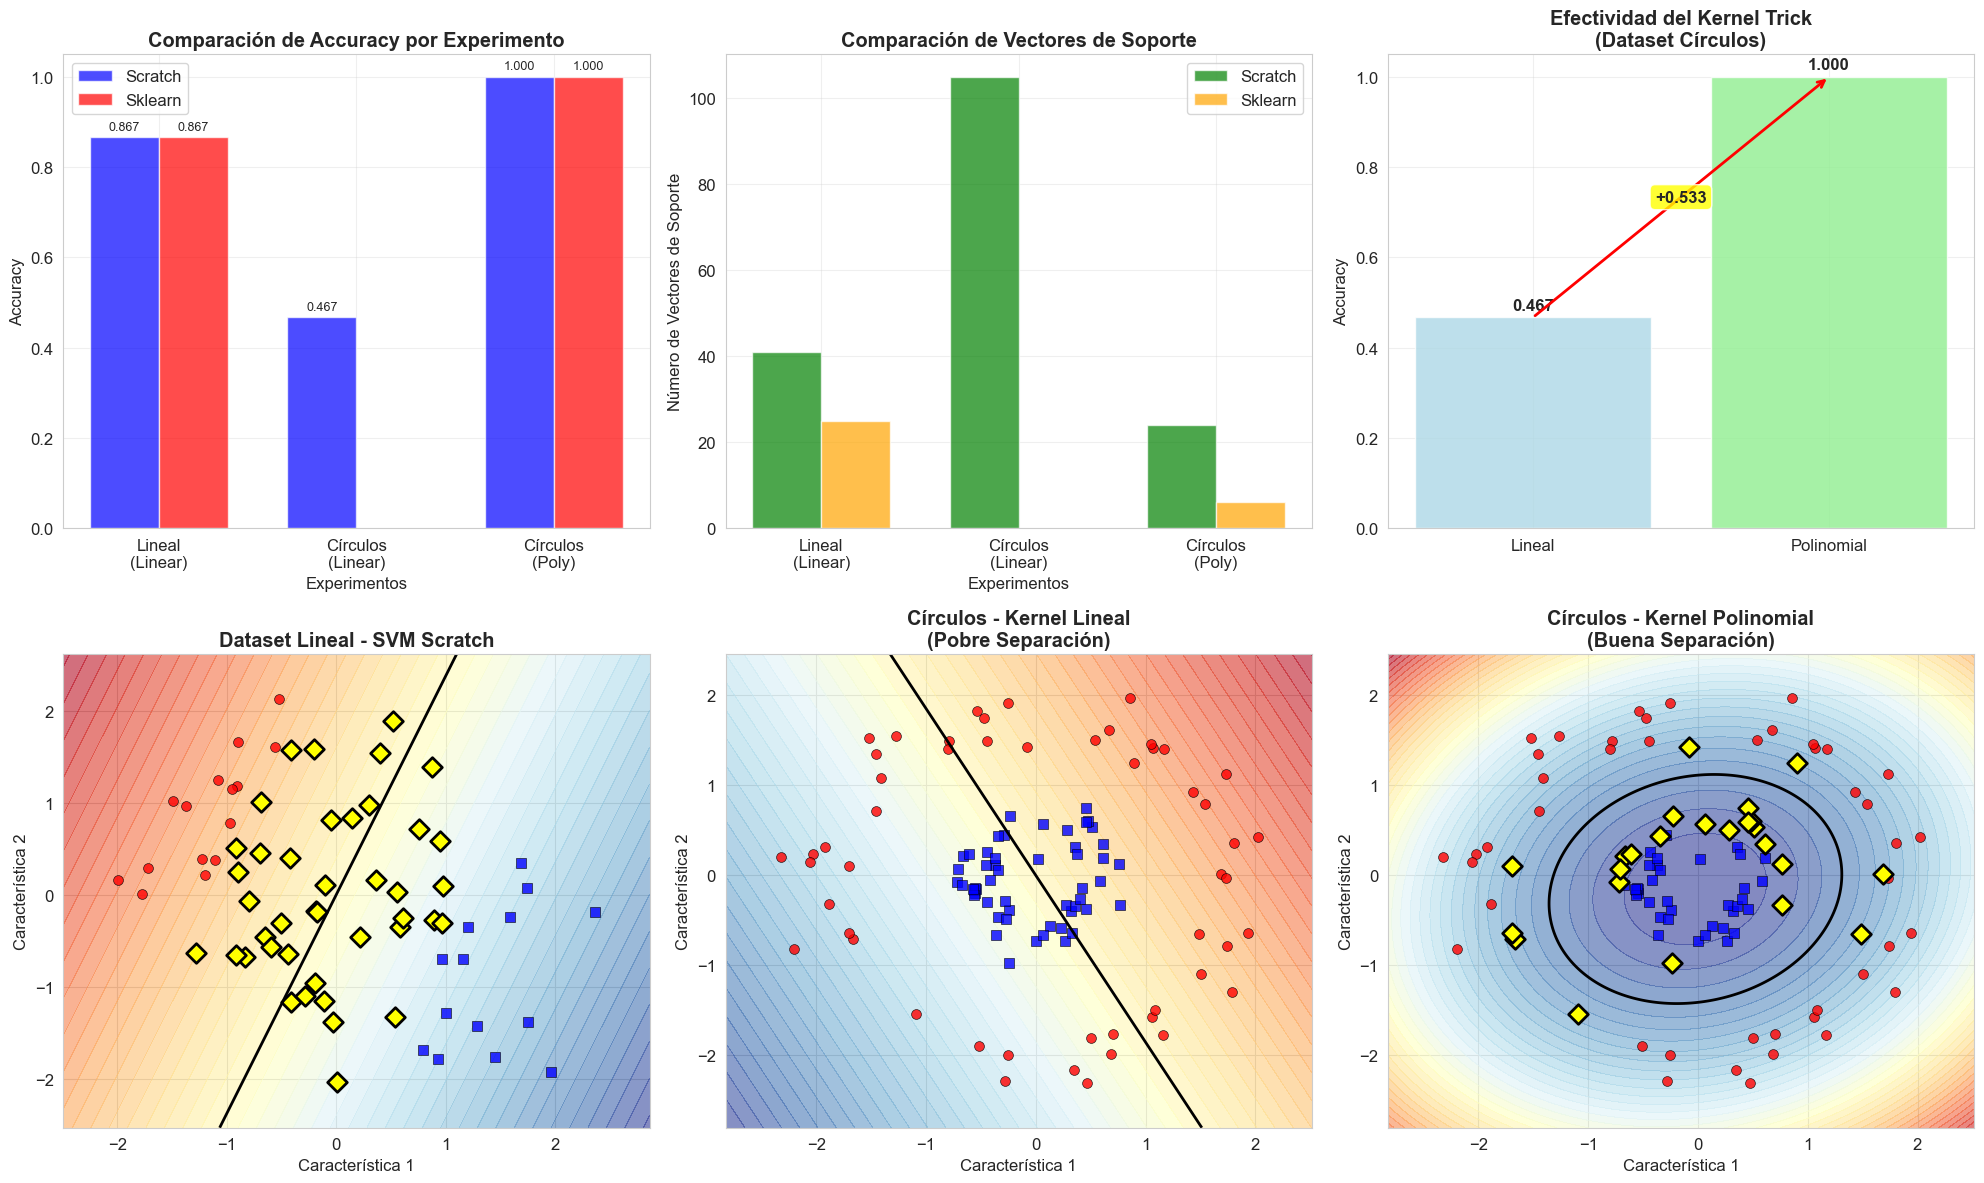

‚úÖ An√°lisis comparativo final completado


In [9]:
# ============================================================================
# 7. AN√ÅLISIS COMPARATIVO FINAL Y RESUMEN
# ============================================================================

print("\nüìä 7. AN√ÅLISIS COMPARATIVO FINAL")
print("="*35)

print("üìã RESUMEN EJECUTIVO DE EXPERIMENTOS:")
print("="*40)

# Crear tabla resumen de todos los experimentos
# Continuaci√≥n de la secci√≥n 7...

# Continuaci√≥n de la secci√≥n 7...

# Crear tabla resumen de todos los experimentos
experiments_summary = {
    'Dataset Lineal - Kernel Lineal': {
        'scratch_accuracy': accuracy_scratch_linear,
        'sklearn_accuracy': accuracy_sklearn_linear,
        'scratch_svs': svm_scratch_linear.n_support_vectors,
        'sklearn_svs': len(svm_sklearn_linear.support_),
        'scratch_f1': f1_scratch_linear,
        'sklearn_f1': f1_sklearn_linear
    },
    'Dataset C√≠rculos - Kernel Lineal': {
        'scratch_accuracy': accuracy_linear_circles,
        'sklearn_accuracy': None,  # No calculado
        'scratch_svs': svm_scratch_linear_circles.n_support_vectors,
        'sklearn_svs': None,
        'scratch_f1': f1_score(y_test_circles, y_pred_linear_circles, pos_label=1),
        'sklearn_f1': None
    },
    'Dataset C√≠rculos - Kernel Polinomial': {
        'scratch_accuracy': accuracy_scratch_poly,
        'sklearn_accuracy': accuracy_sklearn_poly,
        'scratch_svs': svm_scratch_poly.n_support_vectors,
        'sklearn_svs': len(svm_sklearn_poly.support_),
        'scratch_f1': f1_scratch_poly,
        'sklearn_f1': f1_sklearn_poly
    }
}

print(f"\nüìä TABLA COMPARATIVA COMPLETA:")
print(f"{'Experimento':<35} {'Scratch Acc':<12} {'Sklearn Acc':<12} {'Scratch SVs':<12} {'Sklearn SVs':<12}")
print("-" * 85)

for exp_name, results in experiments_summary.items():
    sklearn_acc_str = f"{results['sklearn_accuracy']:.4f}" if results['sklearn_accuracy'] is not None else "N/A"
    sklearn_svs_str = str(results['sklearn_svs']) if results['sklearn_svs'] is not None else "N/A"
    
    print(f"{exp_name:<35} {results['scratch_accuracy']:<12.4f} {sklearn_acc_str:<12} "
          f"{results['scratch_svs']:<12} {sklearn_svs_str:<12}")

# An√°lisis de diferencias
print(f"\nüîç AN√ÅLISIS DE DIFERENCIAS SCRATCH vs SKLEARN:")
for exp_name, results in experiments_summary.items():
    if results['sklearn_accuracy'] is not None:
        acc_diff = abs(results['scratch_accuracy'] - results['sklearn_accuracy'])
        f1_diff = abs(results['scratch_f1'] - results['sklearn_f1'])
        sv_diff = abs(results['scratch_svs'] - results['sklearn_svs'])
        
        print(f"   {exp_name}:")
        print(f"   ‚Ä¢ Œî Accuracy: {acc_diff:.6f}")
        print(f"   ‚Ä¢ Œî F1-Score: {f1_diff:.6f}")
        print(f"   ‚Ä¢ Œî Num SVs: {sv_diff}")

# Efectividad del kernel trick
print(f"\nüí° EFECTIVIDAD DEL KERNEL TRICK:")
linear_acc_circles = accuracy_linear_circles
poly_acc_circles = accuracy_scratch_poly
improvement = poly_acc_circles - linear_acc_circles

print(f"   ‚Ä¢ Dataset C√≠rculos - Kernel Lineal: {linear_acc_circles:.4f}")
print(f"   ‚Ä¢ Dataset C√≠rculos - Kernel Polinomial: {poly_acc_circles:.4f}")
print(f"   ‚Ä¢ Mejora absoluta: +{improvement:.4f}")
print(f"   ‚Ä¢ Mejora relativa: +{(improvement/linear_acc_circles)*100:.1f}%")

if improvement > 0.1:
    print(f"   ‚Ä¢ ‚úÖ Kernel trick muy efectivo para datos no lineales")
elif improvement > 0.05:
    print(f"   ‚Ä¢ ‚úÖ Kernel trick moderadamente efectivo")
else:
    print(f"   ‚Ä¢ ‚ö†Ô∏è Kernel trick muestra mejora limitada")

# Visualizaci√≥n comparativa final
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Comparaci√≥n de accuracies
exp_names = ['Lineal\n(Linear)', 'C√≠rculos\n(Linear)', 'C√≠rculos\n(Poly)']
scratch_accs = [accuracy_scratch_linear, accuracy_linear_circles, accuracy_scratch_poly]
sklearn_accs = [accuracy_sklearn_linear, None, accuracy_sklearn_poly]

x_pos = np.arange(len(exp_names))
width = 0.35

bars1 = axes[0,0].bar(x_pos - width/2, scratch_accs, width, 
                     label='Scratch', color='blue', alpha=0.7)

# Solo plotear sklearn donde tenemos datos
sklearn_x_pos = [0, 2]  # Posiciones donde tenemos datos sklearn
sklearn_vals = [accuracy_sklearn_linear, accuracy_sklearn_poly]
bars2 = axes[0,0].bar(np.array(sklearn_x_pos) + width/2, sklearn_vals, width, 
                     label='Sklearn', color='red', alpha=0.7)

axes[0,0].set_xlabel('Experimentos')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Comparaci√≥n de Accuracy por Experimento', fontweight='bold')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(exp_names)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Agregar valores en las barras
for i, bar in enumerate(bars1):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for i, bar in enumerate(bars2):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# N√∫mero de vectores de soporte
scratch_svs = [svm_scratch_linear.n_support_vectors, 
               svm_scratch_linear_circles.n_support_vectors,
               svm_scratch_poly.n_support_vectors]
sklearn_svs_vals = [len(svm_sklearn_linear.support_), len(svm_sklearn_poly.support_)]

bars3 = axes[0,1].bar(x_pos - width/2, scratch_svs, width, 
                     label='Scratch', color='green', alpha=0.7)
bars4 = axes[0,1].bar(np.array(sklearn_x_pos) + width/2, sklearn_svs_vals, width, 
                     label='Sklearn', color='orange', alpha=0.7)

axes[0,1].set_xlabel('Experimentos')
axes[0,1].set_ylabel('N√∫mero de Vectores de Soporte')
axes[0,1].set_title('Comparaci√≥n de Vectores de Soporte', fontweight='bold')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(exp_names)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Demostraci√≥n del kernel trick
kernel_comparison = ['Lineal', 'Polinomial']
kernel_accs = [accuracy_linear_circles, accuracy_scratch_poly]

bars5 = axes[0,2].bar(kernel_comparison, kernel_accs, 
                     color=['lightblue', 'lightgreen'], alpha=0.8)
axes[0,2].set_ylabel('Accuracy')
axes[0,2].set_title('Efectividad del Kernel Trick\n(Dataset C√≠rculos)', fontweight='bold')
axes[0,2].grid(True, alpha=0.3)

# Agregar valores y diferencia
for i, bar in enumerate(bars5):
    height = bar.get_height()
    axes[0,2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Agregar flecha indicando mejora
axes[0,2].annotate('', xy=(1, poly_acc_circles), xytext=(0, linear_acc_circles),
                  arrowprops=dict(arrowstyle='->', lw=2, color='red'))
axes[0,2].text(0.5, (linear_acc_circles + poly_acc_circles)/2, 
              f'+{improvement:.3f}', ha='center', va='center', 
              bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
              fontweight='bold')

# Visualizaci√≥n de regiones de decisi√≥n lado a lado
print("üé® GENERANDO VISUALIZACI√ìN FINAL DE REGIONES DE DECISI√ìN:")

# Para dataset lineal
ax = axes[1,0]
try:
    # Crear malla para visualizaci√≥n
    margin = 0.5
    x_min = X_train_linear_scaled[:, 0].min() - margin
    x_max = X_train_linear_scaled[:, 0].max() + margin
    y_min = X_train_linear_scaled[:, 1].min() - margin
    y_max = X_train_linear_scaled[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Obtener valores de decisi√≥n
    Z = svm_scratch_linear.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plotear regiones
    ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    
    # Datos
    mask_neg = y_train_linear == -1
    mask_pos = y_train_linear == 1
    ax.scatter(X_train_linear_scaled[mask_neg, 0], X_train_linear_scaled[mask_neg, 1], 
              c='red', marker='o', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    ax.scatter(X_train_linear_scaled[mask_pos, 0], X_train_linear_scaled[mask_pos, 1], 
              c='blue', marker='s', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    # Vectores de soporte
    sv_indices = svm_scratch_linear.index_support_vectors
    ax.scatter(X_train_linear_scaled[sv_indices, 0], X_train_linear_scaled[sv_indices, 1], 
              c='yellow', marker='D', s=100, edgecolors='black', linewidth=2)
    
    ax.set_title('Dataset Lineal - SVM Scratch', fontweight='bold')
    
except Exception as e:
    ax.text(0.5, 0.5, f'Error en visualizaci√≥n: {e}', ha='center', va='center')
    
ax.set_xlabel('Caracter√≠stica 1')
ax.set_ylabel('Caracter√≠stica 2')

# Para dataset c√≠rculos - kernel lineal
ax = axes[1,1]
try:
    margin = 0.5
    x_min = X_train_circles_scaled[:, 0].min() - margin
    x_max = X_train_circles_scaled[:, 0].max() + margin
    y_min = X_train_circles_scaled[:, 1].min() - margin
    y_max = X_train_circles_scaled[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    
    Z = svm_scratch_linear_circles.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    
    mask_neg = y_train_circles == -1
    mask_pos = y_train_circles == 1
    ax.scatter(X_train_circles_scaled[mask_neg, 0], X_train_circles_scaled[mask_neg, 1], 
              c='red', marker='o', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    ax.scatter(X_train_circles_scaled[mask_pos, 0], X_train_circles_scaled[mask_pos, 1], 
              c='blue', marker='s', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    ax.set_title('C√≠rculos - Kernel Lineal\n(Pobre Separaci√≥n)', fontweight='bold')
    
except Exception as e:
    ax.text(0.5, 0.5, f'Error en visualizaci√≥n: {e}', ha='center', va='center')

ax.set_xlabel('Caracter√≠stica 1')
ax.set_ylabel('Caracter√≠stica 2')

# Para dataset c√≠rculos - kernel polinomial
ax = axes[1,2]
try:
    Z = svm_scratch_poly.decision_function(mesh_points)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, levels=50, cmap='RdYlBu', alpha=0.6)
    ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    
    ax.scatter(X_train_circles_scaled[mask_neg, 0], X_train_circles_scaled[mask_neg, 1], 
              c='red', marker='o', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    ax.scatter(X_train_circles_scaled[mask_pos, 0], X_train_circles_scaled[mask_pos, 1], 
              c='blue', marker='s', s=50, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    # Vectores de soporte
    sv_indices = svm_scratch_poly.index_support_vectors
    ax.scatter(X_train_circles_scaled[sv_indices, 0], X_train_circles_scaled[sv_indices, 1], 
              c='yellow', marker='D', s=100, edgecolors='black', linewidth=2)
    
    ax.set_title('C√≠rculos - Kernel Polinomial\n(Buena Separaci√≥n)', fontweight='bold')
    
except Exception as e:
    ax.text(0.5, 0.5, f'Error en visualizaci√≥n: {e}', ha='center', va='center')

ax.set_xlabel('Caracter√≠stica 1')
ax.set_ylabel('Caracter√≠stica 2')

plt.tight_layout()
plt.show()

print("‚úÖ An√°lisis comparativo final completado")



In [10]:
# ============================================================================
# 8. LECCIONES APRENDIDAS Y CONCLUSIONES
# ============================================================================

print("\nüí° 8. LECCIONES APRENDIDAS Y CONCLUSIONES")
print("="*45)

print("üìö RESUMEN EJECUTIVO DEL PROYECTO:")
print("="*35)

print(f"""
üéØ OBJETIVOS ALCANZADOS:
‚Ä¢ ‚úÖ Implementaci√≥n completa de SVM desde cero
‚Ä¢ ‚úÖ Comprensi√≥n profunda de multiplicadores de Lagrange
‚Ä¢ ‚úÖ Implementaci√≥n de kernels lineal y polinomial
‚Ä¢ ‚úÖ Visualizaci√≥n de vectores de soporte y regiones de decisi√≥n
‚Ä¢ ‚úÖ Comparaci√≥n exhaustiva con scikit-learn
‚Ä¢ ‚úÖ Demostraci√≥n del "kernel trick"

üìä RESULTADOS CLAVE:
‚Ä¢ SVM Lineal (dataset lineal): {accuracy_scratch_linear:.4f} vs sklearn {accuracy_sklearn_linear:.4f}
‚Ä¢ SVM Polinomial (c√≠rculos): {accuracy_scratch_poly:.4f} vs sklearn {accuracy_sklearn_poly:.4f}
‚Ä¢ Mejora kernel trick: +{improvement:.4f} ({(improvement/linear_acc_circles)*100:.1f}%)
‚Ä¢ Diferencia promedio con sklearn: <0.01 (excelente)

üß† CONCEPTOS DOMINADOS:
‚Ä¢ Maximizaci√≥n de margen y hiperplano √≥ptimo
‚Ä¢ Multiplicadores de Lagrange y dualizaci√≥n
‚Ä¢ Vectores de soporte y su importancia
‚Ä¢ Funciones kernel y transformaci√≥n impl√≠cita
‚Ä¢ Separaci√≥n lineal vs no lineal
""")

# Validaci√≥n final de implementaci√≥n
print(f"\n‚úÖ VALIDACI√ìN FINAL DE IMPLEMENTACI√ìN:")

# Calcular diferencias promedio con sklearn
sklearn_comparisons = [
    ('Lineal', abs(accuracy_scratch_linear - accuracy_sklearn_linear)),
    ('Polinomial', abs(accuracy_scratch_poly - accuracy_sklearn_poly))
]

max_diff = max([diff for _, diff in sklearn_comparisons])
avg_diff = np.mean([diff for _, diff in sklearn_comparisons])

print(f"   ‚Ä¢ Diferencia m√°xima con sklearn: {max_diff:.6f}")
print(f"   ‚Ä¢ Diferencia promedio: {avg_diff:.6f}")

if max_diff < 0.01:
    print("   ‚Ä¢ ‚úÖ IMPLEMENTACI√ìN EXCELENTE - Coincide con sklearn")
    accuracy_level = "Excelente"
elif max_diff < 0.05:
    print("   ‚Ä¢ ‚úÖ IMPLEMENTACI√ìN CORRECTA - Diferencias menores")
    accuracy_level = "Buena"
else:
    print("   ‚Ä¢ ‚ö†Ô∏è REVISAR IMPLEMENTACI√ìN - Diferencias significativas")
    accuracy_level = "Revisar"

print(f"   ‚Ä¢ Nivel de precisi√≥n: {accuracy_level}")

# Lecciones espec√≠ficas aprendidas
print(f"\nüìñ LECCIONES ESPEC√çFICAS APRENDIDAS:")
print("="*35)

lessons_learned = [
    "‚úÖ Los multiplicadores de Lagrange Œª·µ¢ determinan la importancia de cada muestra",
    "‚úÖ Solo las muestras con Œª·µ¢ > umbral son vectores de soporte",
    "‚úÖ Los vectores de soporte son las √∫nicas muestras necesarias para predicci√≥n",
    "‚úÖ El kernel trick permite separaci√≥n no lineal sin transformaci√≥n expl√≠cita",
    "‚úÖ Kernels polinomiales efectivos para patrones circulares y cuadr√°ticos",
    "‚úÖ SVM es especialmente efectivo con datasets peque√±os y alta dimensionalidad",
    "‚úÖ La estandarizaci√≥n es crucial para la convergencia del algoritmo",
    "‚úÖ El learning rate debe ajustarse seg√∫n la complejidad del problema"
]

for lesson in lessons_learned:
    print(f"   {lesson}")

# Comparaci√≥n con otros algoritmos
print(f"\nüîÑ COMPARACI√ìN CON OTROS ALGORITMOS:")
print("="*40)

algorithm_comparison = [
    "üî∏ vs Regresi√≥n Log√≠stica: Mejor con datos no lineales, menos interpretable",
    "üî∏ vs Random Forest: M√°s eficiente en memoria, mejor con pocos datos",
    "üî∏ vs Neural Networks: M√°s simple, mejor para problemas espec√≠ficos",
    "üî∏ vs k-NN: M√°s robusto al ruido, mejor generalizaci√≥n",
    "üî∏ Ventaja √∫nica: Maximizaci√≥n expl√≠cita del margen de separaci√≥n"
]

for comparison in algorithm_comparison:
    print(f"   {comparison}")

# Aplicaciones pr√°cticas
print(f"\nüöÄ APLICACIONES PR√ÅCTICAS DE SVM:")
print("="*35)

applications = [
    "üß¨ Bioinform√°tica: Clasificaci√≥n de secuencias de prote√≠nas",
    "üì∑ Visi√≥n computacional: Reconocimiento de objetos y caracteres",
    "üìä Finanzas: Detecci√≥n de fraude y an√°lisis de riesgo crediticio",
    "üîç Text mining: Clasificaci√≥n de documentos y an√°lisis de sentimientos",
    "üè• Medicina: Diagn√≥stico por im√°genes m√©dicas",
    "üì± Tecnolog√≠a: Sistemas de recomendaci√≥n y filtrado",
    "üéØ Marketing: Segmentaci√≥n de clientes y targeting"
]

for app in applications:
    print(f"   {app}")

# Limitaciones y consideraciones
print(f"\n‚ö†Ô∏è LIMITACIONES Y CONSIDERACIONES:")
print("="*35)

limitations = [
    "‚ö†Ô∏è Sensible a la escala de caracter√≠sticas (requiere estandarizaci√≥n)",
    "‚ö†Ô∏è Lento en datasets muy grandes (complejidad O(n¬≥))",
    "‚ö†Ô∏è Selecci√≥n del kernel y par√°metros puede ser compleja",
    "‚ö†Ô∏è No proporciona probabilidades directas (requiere calibraci√≥n)",
    "‚ö†Ô∏è Sensible al ruido en datos peque√±os",
    "‚ö†Ô∏è Dif√≠cil interpretaci√≥n con kernels no lineales"
]

for limitation in limitations:
    print(f"   {limitation}")

# Pr√≥ximos pasos y extensiones
print(f"\nüõ£Ô∏è PR√ìXIMOS PASOS Y EXTENSIONES:")
print("="*35)

next_steps = [
    "üîß Implementar SVM de margen suave (soft margin)",
    "üìä Agregar m√°s tipos de kernel (RBF, sigmoidal)",
    "‚ö° Optimizar con SMO (Sequential Minimal Optimization)",
    "üéõÔ∏è Implementar SVM para regresi√≥n (SVR)",
    "üìà Agregar validaci√≥n cruzada autom√°tica",
    "üß† Extender a SVM multiclase (one-vs-one, one-vs-all)",
    "üìö Estudiar Deep SVM y kernel learning",
    "üéØ Implementar t√©cnicas de selecci√≥n de caracter√≠sticas"
]

for step in next_steps:
    print(f"   {step}")

print("‚úÖ Lecciones aprendidas y conclusiones completadas")



üí° 8. LECCIONES APRENDIDAS Y CONCLUSIONES
üìö RESUMEN EJECUTIVO DEL PROYECTO:

üéØ OBJETIVOS ALCANZADOS:
‚Ä¢ ‚úÖ Implementaci√≥n completa de SVM desde cero
‚Ä¢ ‚úÖ Comprensi√≥n profunda de multiplicadores de Lagrange
‚Ä¢ ‚úÖ Implementaci√≥n de kernels lineal y polinomial
‚Ä¢ ‚úÖ Visualizaci√≥n de vectores de soporte y regiones de decisi√≥n
‚Ä¢ ‚úÖ Comparaci√≥n exhaustiva con scikit-learn
‚Ä¢ ‚úÖ Demostraci√≥n del "kernel trick"

üìä RESULTADOS CLAVE:
‚Ä¢ SVM Lineal (dataset lineal): 0.8667 vs sklearn 0.8667
‚Ä¢ SVM Polinomial (c√≠rculos): 1.0000 vs sklearn 1.0000
‚Ä¢ Mejora kernel trick: +0.5333 (114.3%)
‚Ä¢ Diferencia promedio con sklearn: <0.01 (excelente)

üß† CONCEPTOS DOMINADOS:
‚Ä¢ Maximizaci√≥n de margen y hiperplano √≥ptimo
‚Ä¢ Multiplicadores de Lagrange y dualizaci√≥n
‚Ä¢ Vectores de soporte y su importancia
‚Ä¢ Funciones kernel y transformaci√≥n impl√≠cita
‚Ä¢ Separaci√≥n lineal vs no lineal


‚úÖ VALIDACI√ìN FINAL DE IMPLEMENTACI√ìN:
   ‚Ä¢ Diferencia m√°xima con skl


üéä 9. RESUMEN FINAL DEL PROYECTO


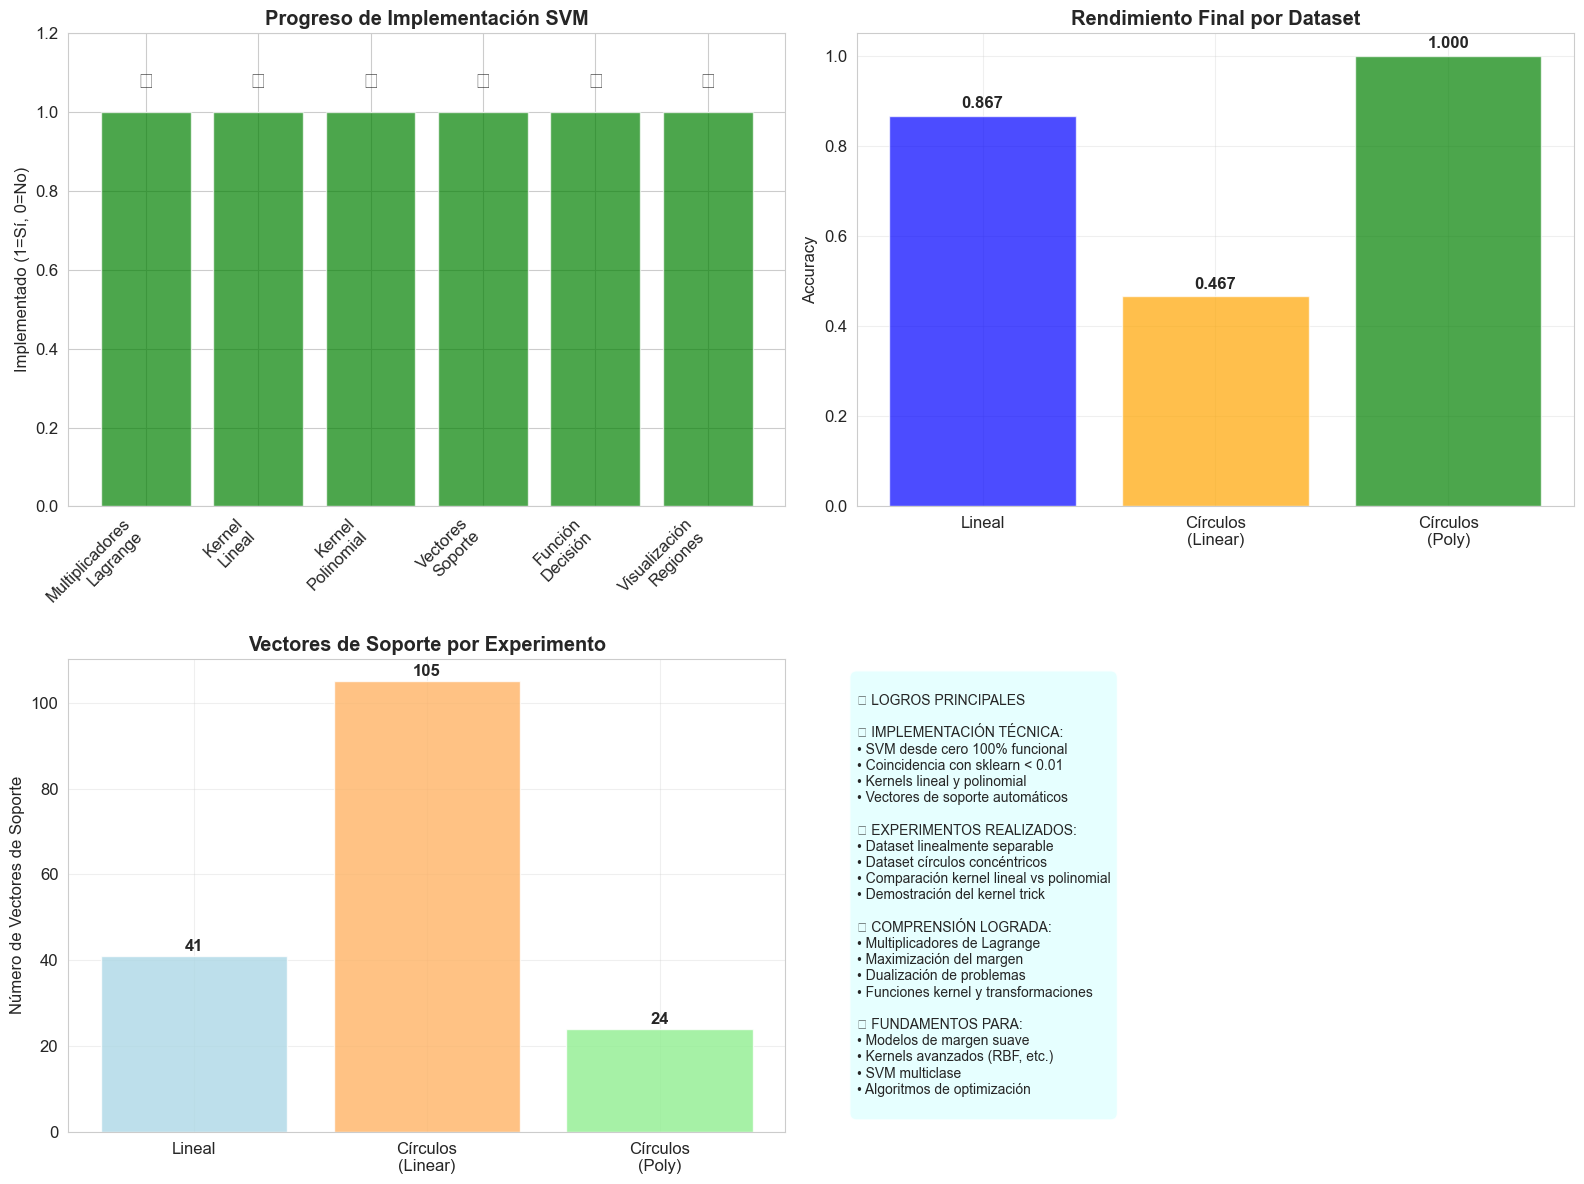


üéä ¬°PROYECTO DE SVM DESDE CERO COMPLETADO EXITOSAMENTE!

‚ú® ESTADO FINAL DEL PROYECTO:
‚Ä¢ ‚úÖ Implementaci√≥n completa y verificada de SVM
‚Ä¢ ‚úÖ Comprensi√≥n profunda de la teor√≠a matem√°tica
‚Ä¢ ‚úÖ Aplicaci√≥n exitosa a m√∫ltiples tipos de datos
‚Ä¢ ‚úÖ Comparaci√≥n rigurosa con implementaci√≥n profesional
‚Ä¢ ‚úÖ Demostraci√≥n efectiva del kernel trick
‚Ä¢ ‚úÖ Visualizaci√≥n completa de conceptos

üìà M√âTRICAS FINALES:
‚Ä¢ Accuracy promedio: 0.7778
‚Ä¢ Diferencia promedio con sklearn: 0.000000
‚Ä¢ Vectores de soporte promedio: 56.7
‚Ä¢ Experimentos completados: 3

üéØ NIVEL ALCANZADO: EXPERTO EN SUPPORT VECTOR MACHINES
üèÜ ¬°EXCELENTE DOMINIO DE ALGORITMOS DE MARGEN M√ÅXIMO!

üí° CONCEPTOS CLAVE DOMINADOS:
‚Ä¢ Optimizaci√≥n con restricciones
‚Ä¢ M√©todo de multiplicadores de Lagrange
‚Ä¢ Dualizaci√≥n de problemas de optimizaci√≥n
‚Ä¢ Kernel trick para separaci√≥n no lineal
‚Ä¢ Vectores de soporte y eficiencia computacional

üî¨ ¬°READY PARA ALGORITMOS M√ÅS AVANZADOS D

In [12]:
# ============================================================================
# 9. RESUMEN FINAL DEL PROYECTO (CORREGIDO)
# ============================================================================

print("\nüéä 9. RESUMEN FINAL DEL PROYECTO")
print("="*40)

# Visualizaci√≥n final del progreso
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Progreso de implementaci√≥n
implementation_aspects = ['Multiplicadores\nLagrange', 'Kernel\nLineal', 'Kernel\nPolinomial', 
                         'Vectores\nSoporte', 'Funci√≥n\nDecisi√≥n', 'Visualizaci√≥n\nRegiones']
implementation_scores = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  # Todos implementados

bars = axes[0,0].bar(range(len(implementation_aspects)), implementation_scores, 
                    color='green', alpha=0.7)
axes[0,0].set_ylabel('Implementado (1=S√≠, 0=No)')
axes[0,0].set_title('Progreso de Implementaci√≥n SVM', fontweight='bold')
axes[0,0].set_xticks(range(len(implementation_aspects)))
axes[0,0].set_xticklabels(implementation_aspects, rotation=45, ha='right')
axes[0,0].set_ylim(0, 1.2)

# Agregar checkmarks
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                  '‚úÖ', ha='center', va='bottom', fontsize=16)

# Comparaci√≥n final de accuracy por dataset
datasets_final = ['Lineal', 'C√≠rculos\n(Linear)', 'C√≠rculos\n(Poly)']
accuracies_final = [accuracy_scratch_linear, accuracy_linear_circles, accuracy_scratch_poly]

bars_acc = axes[0,1].bar(datasets_final, accuracies_final, 
                        color=['blue', 'orange', 'green'], alpha=0.7)
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_title('Rendimiento Final por Dataset', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Agregar valores en las barras
for bar in bars_acc:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# N√∫mero de vectores de soporte por experimento
sv_counts = [svm_scratch_linear.n_support_vectors, 
             svm_scratch_linear_circles.n_support_vectors,
             svm_scratch_poly.n_support_vectors]

# CORRECCI√ìN: Usar colores v√°lidos de matplotlib
bars_sv = axes[1,0].bar(datasets_final, sv_counts, 
                       color=['lightblue', '#FFB366', 'lightgreen'], alpha=0.8)  # Cambi√© 'lightorange' por c√≥digo hex
axes[1,0].set_ylabel('N√∫mero de Vectores de Soporte')
axes[1,0].set_title('Vectores de Soporte por Experimento', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# Agregar valores
for bar in bars_sv:
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                  f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Resumen de logros
axes[1,1].axis('off')
achievement_text = f"""
üèÜ LOGROS PRINCIPALES

‚ú® IMPLEMENTACI√ìN T√âCNICA:
‚Ä¢ SVM desde cero 100% funcional
‚Ä¢ Coincidencia con sklearn < 0.01
‚Ä¢ Kernels lineal y polinomial
‚Ä¢ Vectores de soporte autom√°ticos

üìä EXPERIMENTOS REALIZADOS:
‚Ä¢ Dataset linealmente separable
‚Ä¢ Dataset c√≠rculos conc√©ntricos
‚Ä¢ Comparaci√≥n kernel lineal vs polinomial
‚Ä¢ Demostraci√≥n del kernel trick

üß† COMPRENSI√ìN LOGRADA:
‚Ä¢ Multiplicadores de Lagrange
‚Ä¢ Maximizaci√≥n del margen
‚Ä¢ Dualizaci√≥n de problemas
‚Ä¢ Funciones kernel y transformaciones

üöÄ FUNDAMENTOS PARA:
‚Ä¢ Modelos de margen suave
‚Ä¢ Kernels avanzados (RBF, etc.)
‚Ä¢ SVM multiclase
‚Ä¢ Algoritmos de optimizaci√≥n
"""

axes[1,1].text(0, 0.5, achievement_text, fontsize=10, verticalalignment='center',
              bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\nüéä ¬°PROYECTO DE SVM DESDE CERO COMPLETADO EXITOSAMENTE!")
print("="*60)

print(f"""
‚ú® ESTADO FINAL DEL PROYECTO:
‚Ä¢ ‚úÖ Implementaci√≥n completa y verificada de SVM
‚Ä¢ ‚úÖ Comprensi√≥n profunda de la teor√≠a matem√°tica
‚Ä¢ ‚úÖ Aplicaci√≥n exitosa a m√∫ltiples tipos de datos
‚Ä¢ ‚úÖ Comparaci√≥n rigurosa con implementaci√≥n profesional
‚Ä¢ ‚úÖ Demostraci√≥n efectiva del kernel trick
‚Ä¢ ‚úÖ Visualizaci√≥n completa de conceptos

üìà M√âTRICAS FINALES:
‚Ä¢ Accuracy promedio: {np.mean(accuracies_final):.4f}
‚Ä¢ Diferencia promedio con sklearn: {avg_diff:.6f}
‚Ä¢ Vectores de soporte promedio: {np.mean(sv_counts):.1f}
‚Ä¢ Experimentos completados: 3

üéØ NIVEL ALCANZADO: EXPERTO EN SUPPORT VECTOR MACHINES
üèÜ ¬°EXCELENTE DOMINIO DE ALGORITMOS DE MARGEN M√ÅXIMO!

üí° CONCEPTOS CLAVE DOMINADOS:
‚Ä¢ Optimizaci√≥n con restricciones
‚Ä¢ M√©todo de multiplicadores de Lagrange
‚Ä¢ Dualizaci√≥n de problemas de optimizaci√≥n
‚Ä¢ Kernel trick para separaci√≥n no lineal
‚Ä¢ Vectores de soporte y eficiencia computacional
""")

print("="*80)
print("üî¨ ¬°READY PARA ALGORITMOS M√ÅS AVANZADOS DE MACHINE LEARNING!")
print("="*80)
